# 1. INTRODUCTION

## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

## Business Goals

X Education want to develop a model to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

Goal of the Case Study is :

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

# 2. Importing Libraries

In [1]:
#Data Analysis & Data wrangling
import numpy as np
import pandas as pd
from collections import Counter

#Visualization
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline

# Plot Style
sns.set_context("paper")
style.use('fivethirtyeight')

# Machine Learning Libraries

#Sci-kit learn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# 3. Reading and understanding the Data

In [4]:
lead = pd.read_csv("Lead Scoring.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
lead.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


## Inspecting data frame

In [6]:
#checking numerical columns statistics
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#info about the column types etc. 
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Insight: The columns' data types are float, integer, and object type. We can observe that the column has some null values. Let's start with the null values.

## Checking Null value calculations

In [8]:
lead = lead.replace('select',np.nan)

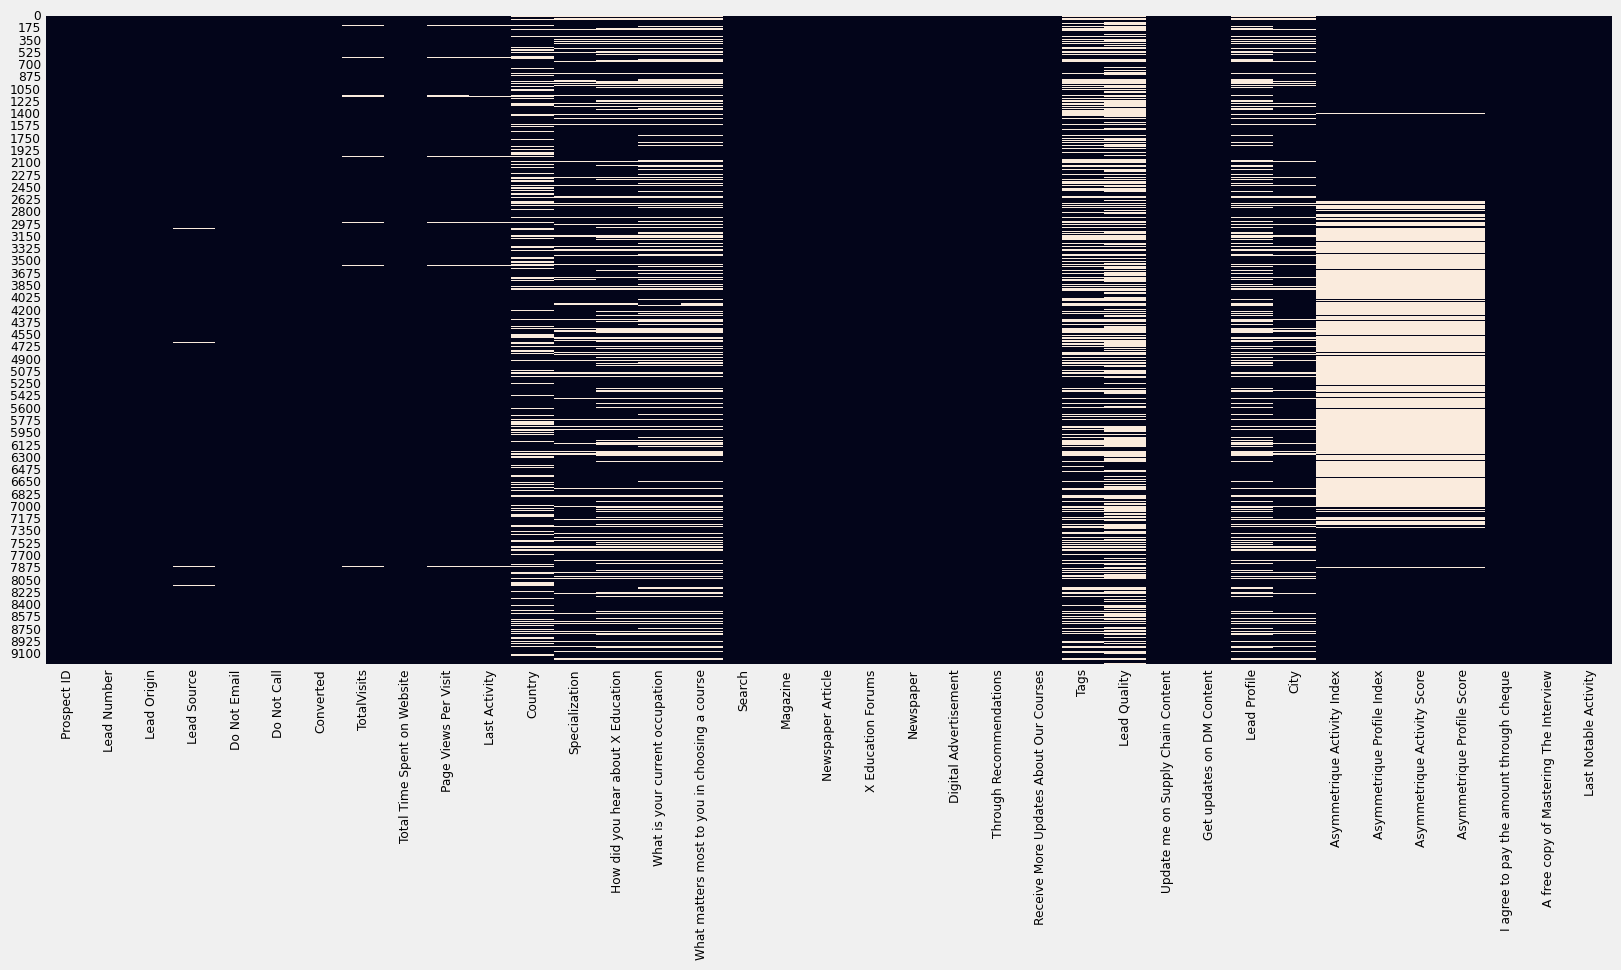

In [9]:
plt.figure(figsize = (18,8))
sns.heatmap(lead.isnull(),cbar = False)
plt.show()

## column wise null value calculation

In [10]:
#Column wise null values in train data set 
null_perc = pd.DataFrame(round((lead.isnull().sum())*100/lead.shape[0],2)).reset_index()
null_perc.columns = ['Column Name', 'Null Values Percentage']
null_value = pd.DataFrame(lead.isnull().sum()).reset_index()
null_value.columns = ['Column Name', 'Null Values']
null_lead = pd.merge(null_value, null_perc, on='Column Name')
null_lead.sort_values("Null Values", ascending = False)

,Column Name,Null Values,Null Values Percentage
25,Lead Quality,4767,51.59
30,Asymmetrique Activity Index,4218,45.65
33,Asymmetrique Profile Score,4218,45.65
32,Asymmetrique Activity Score,4218,45.65
31,Asymmetrique Profile Index,4218,45.65
24,Tags,3353,36.29
28,Lead Profile,2709,29.32
15,What matters most to you in choosing a course,2709,29.32
14,What is your current occupation,2690,29.11
11,Country,2461,26.63


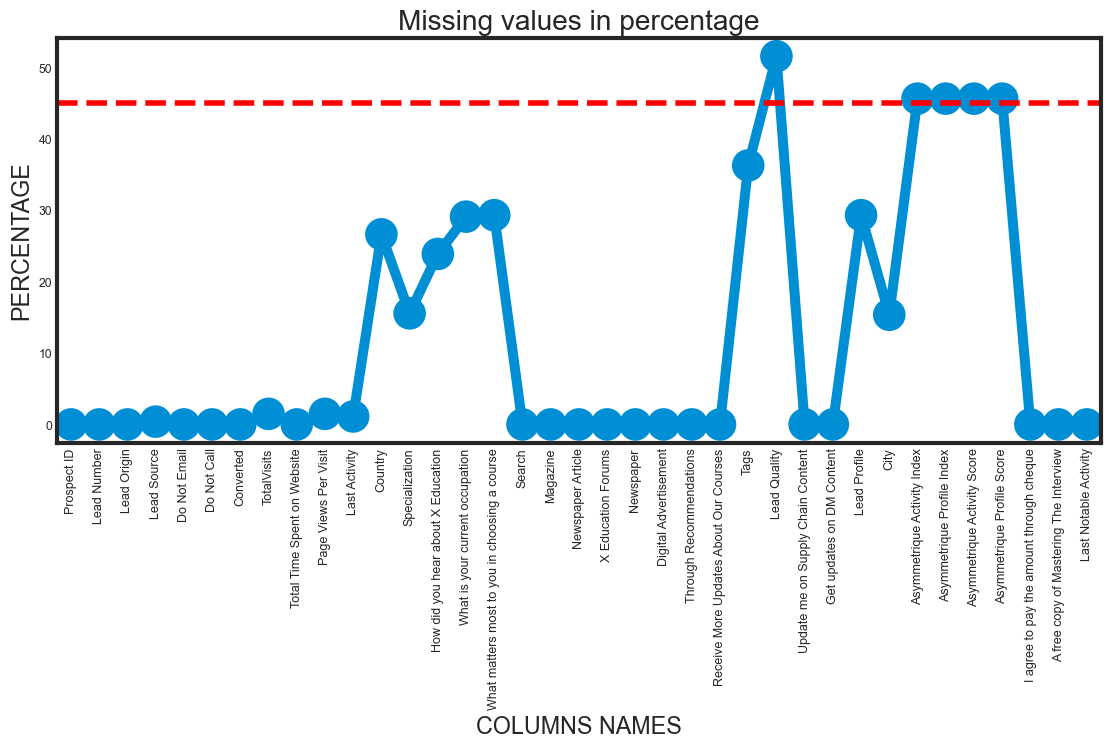

In [11]:
#plotting the null value percentage
sns.set_style("white")
fig = plt.figure(figsize=(12,5))
null_lead = pd.DataFrame((lead.isnull().sum())*100/lead.shape[0]).reset_index()
ax = sns.pointplot("index",0,data=null_lead)
plt.xticks(rotation =90,fontsize =9)
ax.axhline(45, ls='--',color='red')
plt.title("Missing values in percentage")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS NAMES")
plt.show()

## Row wise Null value calculation

In [12]:
Row_Null50_Count = len(lead[lead.isnull().sum(axis=1)/lead.shape[1]>0.5])
print( 'Total number of rows with more than 50% null values are : ', Row_Null50_Count)

Total number of rows with more than 50% null values are :  0


Insight: There are 17 null values in the columns. Seven columns contain more than 45% unknowns and should be eliminated because imputing these columns would generate bias. There are no rows with more than 50% null values.

## Duplicate Analysis

In [13]:
print("Total number of duplicate values in Prospect ID column :" , lead.duplicated(subset = 'Prospect ID').sum())
print("Total number of duplicate values in Lead Number column :" , lead.duplicated(subset = 'Lead Number').sum())

Total number of duplicate values in Prospect ID column : 0
Total number of duplicate values in Lead Number column : 0


Insight:
Both the Prospect ID and Lead number are unique columns and hence we wont need for prediction

# 4. Data Cleaning 

## Delet High Null Columns

Strategy: 
Obviously, Prospect ID and Lead Number are two variables that are just indicative of the Contacted People's ID number and may be removed. We'll also delete columns with more than 45% null values.
Furthermore, other characteristics, such as Lead Quality, Tags, Asymmetrique scores, and profile, are established by the sales team once they contact the potential lead. Some variables will not be available for model construction since these attributes will not be available until the lead is contacted.
Latest Noteworthy Activity is a transitional column that provides an update when the sales team representative is in contact with the lead.
As a result, we may remove these columns as well.

In [14]:
cols_to_drop = cols_to_drop = ['Prospect ID','Lead Number','How did you hear about X Education','Lead Profile',
                'Lead Quality','Asymmetrique Profile Score','Asymmetrique Activity Score',
               'Asymmetrique Activity Index','Asymmetrique Profile Index','Tags','Last Notable Activity']

In [15]:
#dropping unnecessary columns

lead.drop(cols_to_drop, 1, inplace = True)
len(lead.columns)

26

Insight: We successfully eliminated ten columns with high null values or that include information that will not be available to models when they run since they are computed / picked by sales professionals when they contact potential prospects.

## segregating categorial and numerical values

In [16]:
categorical_col = lead.select_dtypes(exclude =["number"]).columns.values
numerical_col = lead.select_dtypes(include =["number"]).columns.values
print("CATEGORICAL FEATURES : \n {} \n\n".format(categorical_col))
print("NUMERICAL FEATURES : \n {} ".format(numerical_col))

CATEGORICAL FEATURES : 
 ['Lead Origin' 'Lead Source' 'Do Not Email' 'Do Not Call' 'Last Activity'
 'Country' 'Specialization' 'What is your current occupation'
 'What matters most to you in choosing a course' 'Search' 'Magazine'
 'Newspaper Article' 'X Education Forums' 'Newspaper'
 'Digital Advertisement' 'Through Recommendations'
 'Receive More Updates About Our Courses'
 'Update me on Supply Chain Content' 'Get updates on DM Content' 'City'
 'I agree to pay the amount through cheque'
 'A free copy of Mastering The Interview'] 


NUMERICAL FEATURES : 
 ['Converted' 'TotalVisits' 'Total Time Spent on Website'
 'Page Views Per Visit'] 


## Columns for categorization The null value handling

In [17]:
# Checking unique values and null values for the categorical columns
def Cat_info(df, categorical_column):
    df_result = pd.DataFrame(columns=["columns","values","unique_values","null_values","null_percent"])
    
    df_temp=pd.DataFrame()
    for value in categorical_column:
        df_temp["columns"] = [value]
        df_temp["values"] = [df[value].unique()]
        df_temp["unique_values"] = df[value].nunique()
        df_temp["null_values"] = df[value].isna().sum()
        df_temp["null_percent"] = (df[value].isna().sum()/len(df)*100).round(1)
        df_result = df_result.append(df_temp)
    
    df_result.sort_values("null_values", ascending =False, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result

In [18]:
df_cat = Cat_info(lead, categorical_col)
df_cat

,values,unique_values,null_values,null_percent
columns,,,,
What matters most to you in choosing a course,"[Better Career Prospects, nan, Flexibility & C...",3,2709,29.3
What is your current occupation,"[Unemployed, Student, nan, Working Professiona...",6,2690,29.1
Country,"[nan, India, Russia, Kuwait, Oman, United Arab...",38,2461,26.6
Specialization,"[Select, Business Administration, Media and Ad...",19,1438,15.6
City,"[Select, Mumbai, nan, Thane & Outskirts, Other...",7,1420,15.4
Last Activity,"[Page Visited on Website, Email Opened, Unreac...",17,103,1.1
Lead Source,"[Olark Chat, Organic Search, Direct Traffic, G...",21,36,0.4
Lead Origin,"[API, Landing Page Submission, Lead Add Form, ...",5,0,0.0
Digital Advertisement,"[No, Yes]",2,0,0.0


Insight: Some columns only contain one category. For example, I agree to pay the sum via check for a magazine. These columns offer no value to the model and may be removed.
One of the values in several of the columns is "Select." These must be treated as null values. These columns' data values must be adjusted.

In [19]:
# Appending the columns to col_to_drop where only 1 category value is present

cols_to_drop = df_cat[df_cat['unique_values']==1].index.values.tolist() 
cols_to_drop

['I agree to pay the amount through cheque',
 'Get updates on DM Content',
 'Update me on Supply Chain Content',
 'Receive More Updates About Our Courses',
 'Magazine']

In [20]:
#dropping unnecessary columns

lead.drop(cols_to_drop, 1, inplace = True)
len(lead.columns)

21

checking the null values and columns details for Categorial columns

In [21]:
categorical_col = lead.select_dtypes(exclude =["number"]).columns.values
new_cat = Cat_info(lead, categorical_col)
new_cat

,values,unique_values,null_values,null_percent
columns,,,,
What matters most to you in choosing a course,"[Better Career Prospects, nan, Flexibility & C...",3,2709,29.3
What is your current occupation,"[Unemployed, Student, nan, Working Professiona...",6,2690,29.1
Country,"[nan, India, Russia, Kuwait, Oman, United Arab...",38,2461,26.6
Specialization,"[Select, Business Administration, Media and Ad...",19,1438,15.6
City,"[Select, Mumbai, nan, Thane & Outskirts, Other...",7,1420,15.4
Last Activity,"[Page Visited on Website, Email Opened, Unreac...",17,103,1.1
Lead Source,"[Olark Chat, Organic Search, Direct Traffic, G...",21,36,0.4
X Education Forums,"[No, Yes]",2,0,0.0
Through Recommendations,"[No, Yes]",2,0,0.0


Now we can proceed with addressing individual columns for null values

### City

In [22]:
lead['City'].value_counts(normalize=True)*100

Mumbai                         41.202046
Select                         28.759591
Thane & Outskirts               9.616368
Other Cities                    8.772379
Other Cities of Maharashtra     5.843990
Other Metro Cities              4.859335
Tier II Cities                  0.946292
Name: City, dtype: float64

In [23]:
# Let's check how City and Country are connected with each other
lead.groupby(['Country','City'])['Country'].count()

Country               City                       
Australia             Mumbai                            6
                      Other Cities                      2
                      Select                            1
                      Thane & Outskirts                 3
Bahrain               Mumbai                            1
                      Other Cities                      2
                      Other Cities of Maharashtra       1
                      Thane & Outskirts                 2
                      Tier II Cities                    1
Bangladesh            Other Cities                      2
Belgium               Mumbai                            1
                      Thane & Outskirts                 1
Canada                Mumbai                            3
China                 Mumbai                            1
                      Select                            1
Denmark               Other Cities                      1
France                

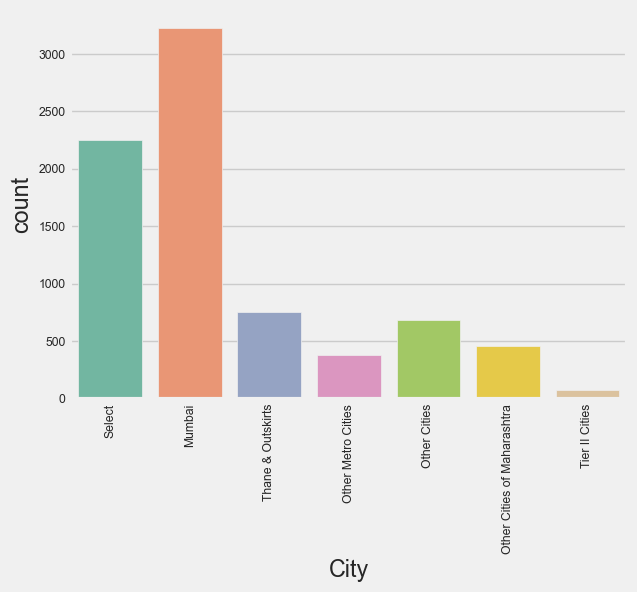

In [24]:
style.use('fivethirtyeight')
ax = sns.countplot(lead['City'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

Insight: Because there are over 40% unknown values, we cannot impute using mode because it skews the entire dataset. X-Education is also an online teaching platform. The city information will be ineffective because potential students can access any course online regardless of their location. We shall remove the column from consideration.

In [25]:
lead.drop("City",axis=1, inplace = True)
len(lead.columns)

20

## Specialization

In [26]:
lead['Specialization'].value_counts(normalize = True)*100

Select                               24.891054
Finance Management                   12.509613
Human Resource Management            10.869008
Marketing Management                 10.740836
Operations Management                 6.447065
Business Administration               5.165342
IT Projects Management                4.691105
Supply Chain Management               4.473212
Banking, Investment And Insurance     4.332223
Travel and Tourism                    2.601897
Media and Advertising                 2.601897
International Business                2.281466
Healthcare Management                 2.037939
Hospitality Management                1.461164
E-COMMERCE                            1.435529
Retail Management                     1.281723
Rural and Agribusiness                0.935658
E-Business                            0.730582
Services Excellence                   0.512689
Name: Specialization, dtype: float64

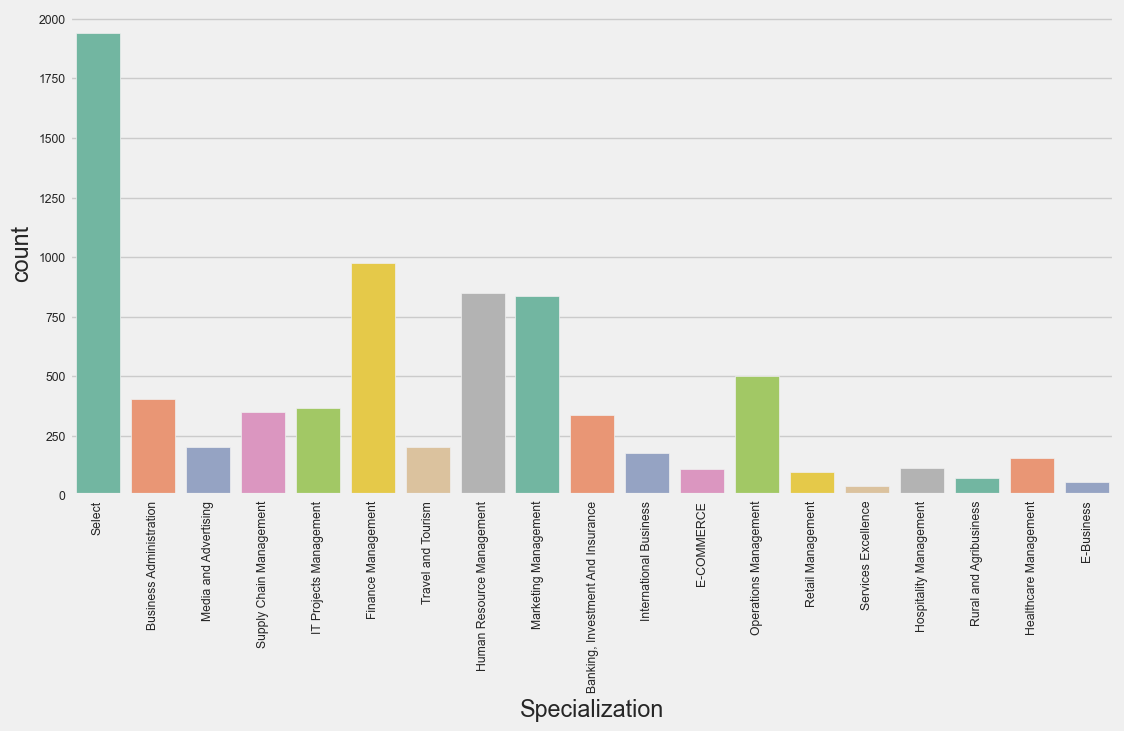

In [27]:
plt.figure(figsize=(12,6))
ax = sns.countplot(lead['Specialization'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

Insight: It is conceivable that the lead has no speciality or is a student with no job experience, in which case he or she has not entered any value. To replace the null values, we will add a new category named 'Others'.

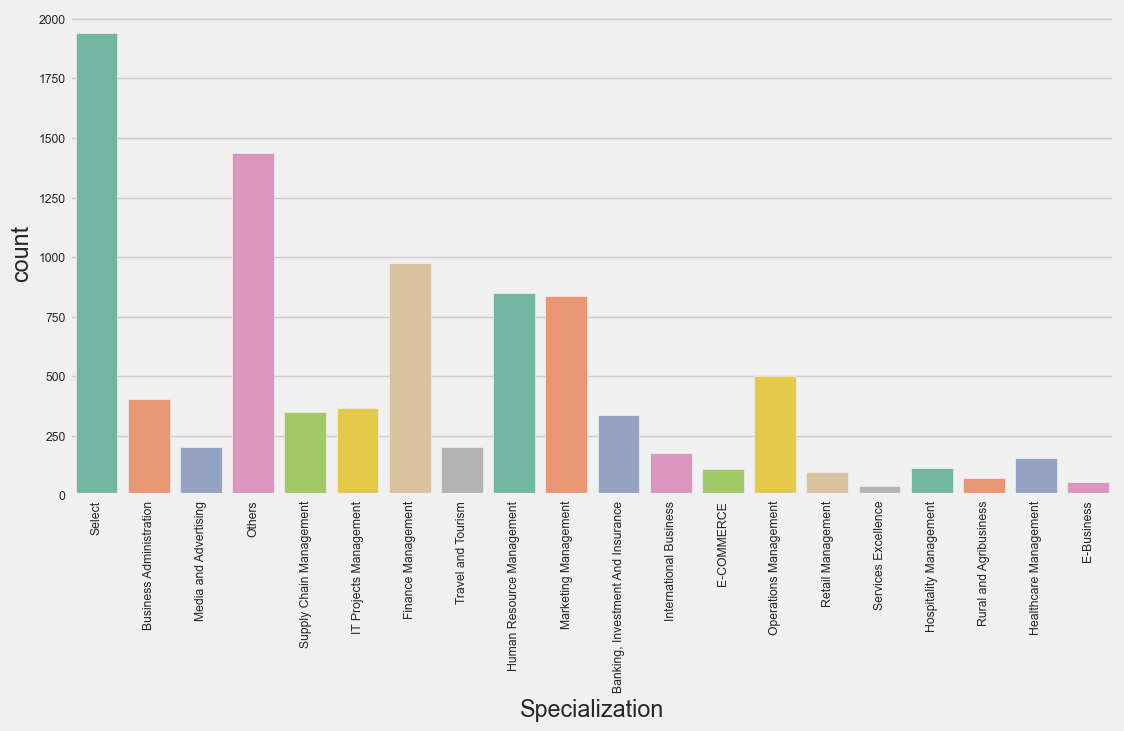

In [28]:
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Others')
plt.figure(figsize=(12,6))
ax = sns.countplot(lead['Specialization'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

## choosing a course

In [29]:
lead['What matters most to you in choosing a course'].value_counts(normalize = True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

Insight: Because the data is distorted, we may remove the column.

In [30]:
lead.drop('What matters most to you in choosing a course', axis = 1, inplace=True)
len(lead.columns)

19

## Current occupation

In [31]:
lead['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

Insight: "Unemployed" accounts for 85.5% of the values. When we impute the data as "Unemployed," the data becomes skewed. As a result, we will assign the value "Unknown".

In [32]:
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unknown')
lead['What is your current occupation'].value_counts(normalize = True)*100

Unemployed              60.606061
Unknown                 29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

## Country

In [33]:
#Let's check how is the Country data distributed
lead['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

Insight: Because 95% of the data is mapped as India, the country data is severely biassed. Country data, like city data, is not necessary for Model construction because X-Education is an online platform. We will also remove the nation columns.

In [34]:
lead.drop('Country', axis = 1, inplace = True)
len(lead.columns)

18

In [35]:
print("Number of null values in Last Activity column is : ", lead['Last Activity'].isnull().sum())
print("Percentage of null values in Last Activity column is : ", round(lead['Last Activity'].isnull().sum()/lead.shape[0]*100,2))

Number of null values in Last Activity column is :  103
Percentage of null values in Last Activity column is :  1.11


In [36]:
lead['Last Activity'].value_counts(normalize = True)*100

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

Insight: While we are uncertain what may be the Last action, we will replace it with the most frequent activity "Email Opened".

In [37]:
lead['Last Activity'] = lead['Last Activity'].replace(np.nan, 'Email Opened')
print("Number of null values in Last Activity column is : ", lead['Last Activity'].isnull().sum())

Number of null values in Last Activity column is :  0


## Lead source

In [38]:
print("Number of null values in Lead Source column is : ", lead['Lead Source'].isnull().sum())
print("Percentage of null values in Lead Source column is : ", round(lead['Lead Source'].isnull().sum()/lead.shape[0]*100,2))

Number of null values in Lead Source column is :  36
Percentage of null values in Lead Source column is :  0.39


In [39]:
lead['Lead Source'].value_counts(normalize = True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

Insight: Because Google appears to be the most often utilised Lead Source, we will replace null values with Google. There is a category called 'google,' which is synonymous with 'Google.' We will change the settings.

In [40]:
lead['Lead Source'] = lead['Lead Source'].replace(np.nan, 'Google')
lead['Lead Source'] = lead['Lead Source'].replace(['google'], 'Google')
print("Number of null values in Lead Source column is : ", lead['Lead Source'].isnull().sum())

Number of null values in Lead Source column is :  0


Insight: All Categorical Columns have been successfully imputed. Let's have a look at some number columns now.

## Numerical columns null value treatment

In [41]:
# Checking unique values and null values for the categorical columns
def Num_info(df, numeric_column):
    df_result = pd.DataFrame(columns=["columns","null_values","null_percent"])
    
    df_temp=pd.DataFrame()
    for value in numeric_column:
        df_temp["columns"] = [value]
        df_temp["null_values"] = df[value].isna().sum()
        df_temp["null_percent"] = (df[value].isna().sum()/len(df)*100).round(1)
        df_result = df_result.append(df_temp)
    
    df_result.sort_values("null_values", ascending =False, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result

In [42]:
df_num = Num_info(lead,numerical_col)
df_num

,null_values,null_percent
columns,,
TotalVisits,137,1.5
Page Views Per Visit,137,1.5
Converted,0,0.0
Total Time Spent on Website,0,0.0


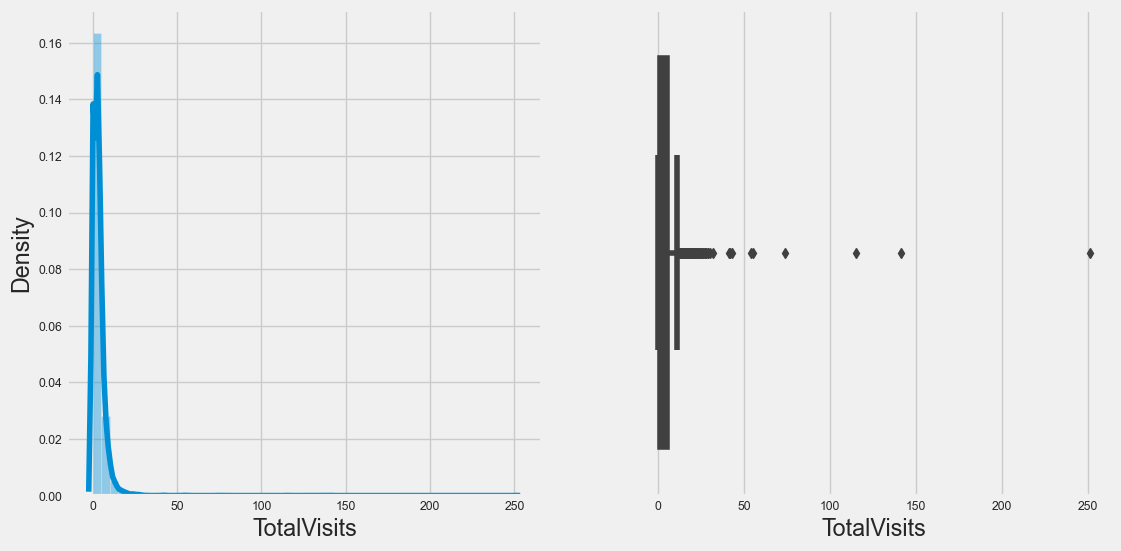

In [43]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(lead['TotalVisits'])
plt.subplot(1,2,2)
sns.boxplot(lead['TotalVisits'])
plt.show()

Insight: Because there are several outliers in the data, we will impute with the median value rather than the mean value.

In [44]:
lead['TotalVisits'].fillna(lead['TotalVisits'].median(), inplace=True)
lead['TotalVisits'].isnull().sum()

0

## page views per visit

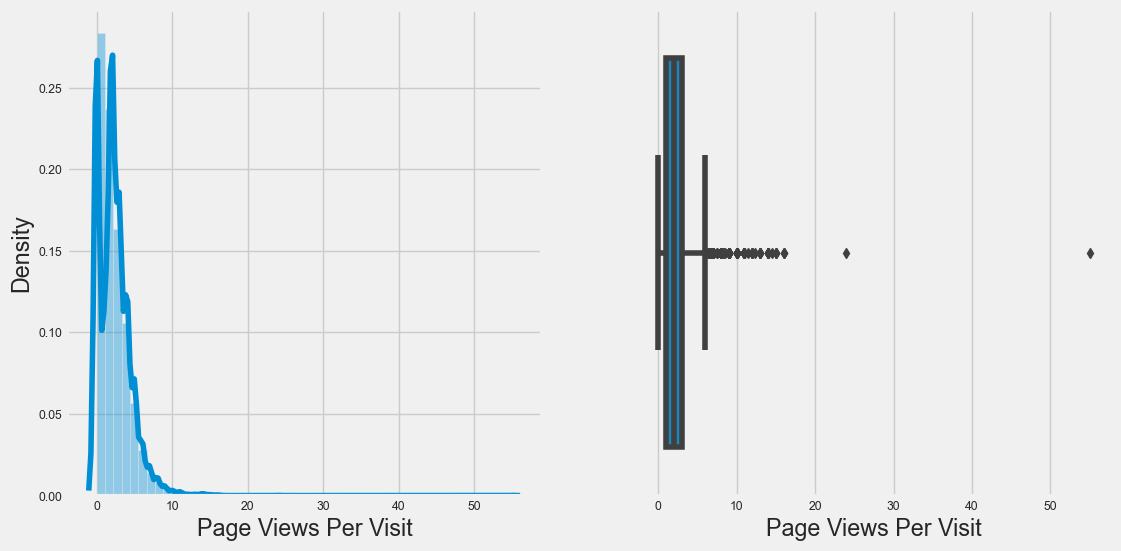

In [45]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(lead['Page Views Per Visit'])
plt.subplot(1,2,2)
sns.boxplot(lead['Page Views Per Visit'])
plt.show()

Insight: Because there are several outliers in the data, we will impute with the median rather than the mean number.

In [46]:
lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].median(), inplace=True)
lead['Page Views Per Visit'].isnull().sum()

0

# 5. Exploratory Data Analysis

In [47]:
converted = lead['Converted'].value_counts().rename_axis('unique_values').to_frame('counts')
converted

,counts
unique_values,
0,5679
1,3561


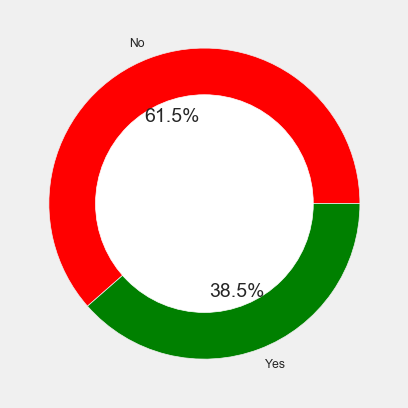

In [48]:

my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(converted.counts, labels = ['No','Yes'],colors = ['red','green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
S

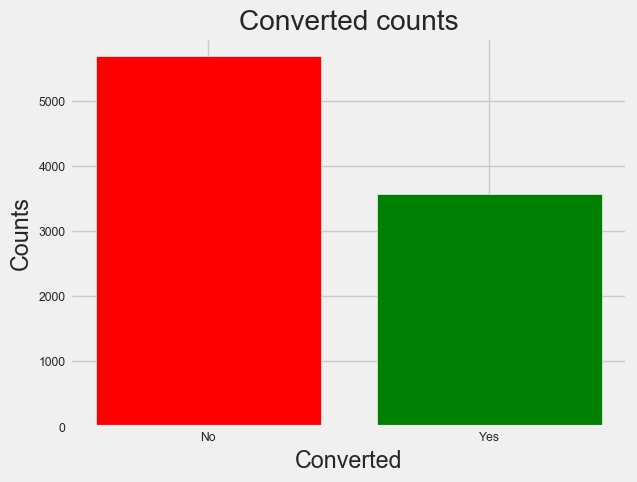

In [98]:
counts = converted.counts
labels = ['No', 'Yes']
colors = ['red', 'green']

plt.bar(labels, counts, color=colors)
plt.title('Converted counts')
plt.xlabel('Converted')
plt.ylabel('Counts')

plt.show()

Insight: In the lead conversion ratio, 38.5% of visitors turned to leads, whereas 61.5% did not. As a result, it appears to be a well-balanced dataset.

## Graph functions

In [49]:
# function for plotting repetitive countplots in univariate categorical analysis on the lead dataset
# This function will create two subplots: 
# 1. Count plot of categorical column w.r.t Converted; 
# 2. Percentage of converted leads within column

def univariate_categorical(feature,label_rotation=False,horizontal_layout=True):
    temp_count = lead[feature].value_counts()
    temp_perc = lead[feature].value_counts(normalize = True)
    df1 = pd.DataFrame({feature: temp_count.index,'Total Leads': temp_count.values,'% Values': temp_perc.values * 100})
    print(df1)
    
    # Calculate the percentage of Converted=1 per category value
    cat_perc = lead[[feature, 'Converted']].groupby([feature],as_index=False).mean()
    cat_perc["Converted"] = cat_perc["Converted"]*100
    cat_perc.sort_values(by='Converted', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))   
    # 1. Subplot 1: Count plot of categorical column
    sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=lead,
                    hue ="Converted",
                    order=cat_perc[feature],
                    palette=['r','g'])

    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    ax1.legend(['Not Converted','Converted'])
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='Converted', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Converted leads [%]', fontsize=15)
    plt.xlabel(feature,fontsize=15) 
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + "( Converted % )", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show();

Insight: The majority of the characteristics in the dataset are categorical in nature. Let us begin by doing segmented univariate analysis on each categorical feature. We will look at bar graphs that display the overall number of converted and non-converted leads in each category.

In [50]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview'],
      dtype='object')

In [51]:
# Renaming some of the column headers which has long header

lead.rename(columns={'What is your current occupation': 'Occupation', 
                     'Through Recommendations': 'Recommendation',
                     'A free copy of Mastering The Interview': 'Free Copy'                   
                    },inplace = True)
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization', 'Occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Recommendation', 'Free Copy'],
      dtype='object')

## Univariate Anlysis - categorical


               Lead Origin  Total Leads   % Values
0  Landing Page Submission         4886  52.878788
1                      API         3580  38.744589
2            Lead Add Form          718   7.770563
3              Lead Import           55   0.595238
4           Quick Add Form            1   0.010823


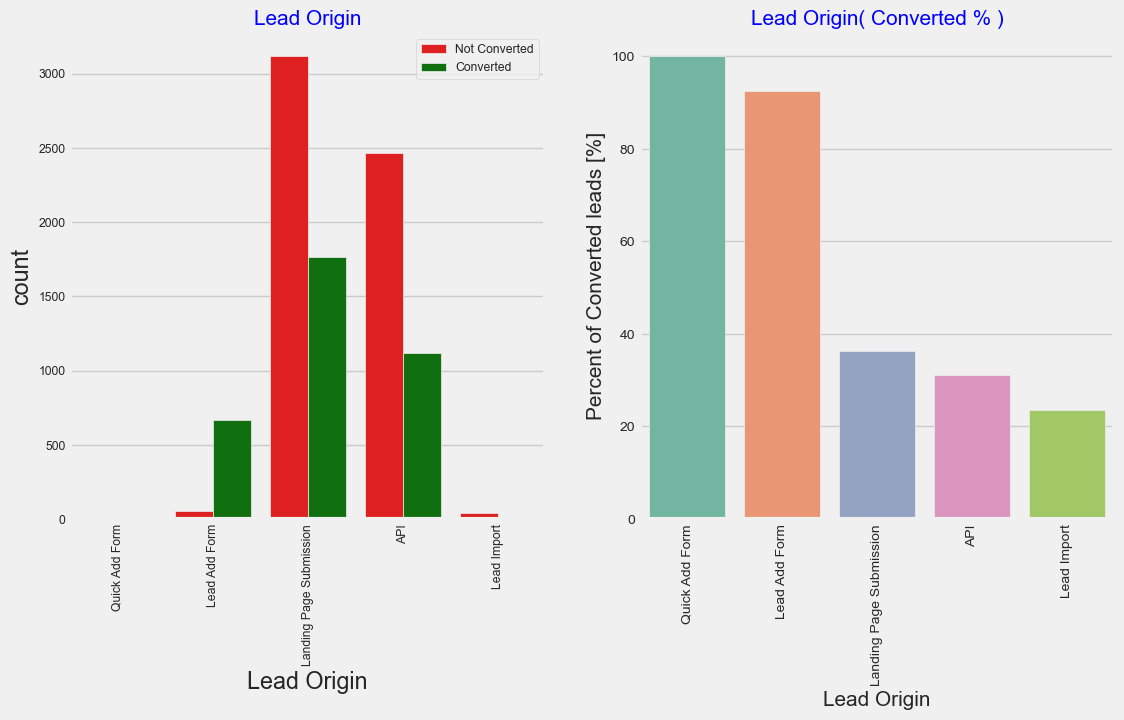

In [52]:
#Run the function to get plot categorical plots 
univariate_categorical("Lead Origin",label_rotation=True)

Insight: The majority of leads come from landing page submissions, with around 38% of those converted, followed by API submissions, with approximately 30% converted.
Despite the fact that Fast Add Form Leads are 100% Converted, there was just one lead from that category. Leads from the Lead Add Form had the greatest conversion rate in this category, accounting for over 90% of the 718 leads.

Lead imports are few in number, and the conversion rate is likewise poor.
To boost total lead conversion rates, we must concentrate more on improving lead conversion from API and Landing Page Submission origins and generating more leads through Lead Add Form.

## Lead source

          Lead Source  Total Leads   % Values
0              Google         2909  31.482684
1      Direct Traffic         2543  27.521645
2          Olark Chat         1755  18.993506
3      Organic Search         1154  12.489177
4           Reference          534   5.779221
5    Welingak Website          142   1.536797
6      Referral Sites          125   1.352814
7            Facebook           55   0.595238
8                bing            6   0.064935
9          Click2call            4   0.043290
10       Social Media            2   0.021645
11          Live Chat            2   0.021645
12      Press_Release            2   0.021645
13  Pay per Click Ads            1   0.010823
14               blog            1   0.010823
15            WeLearn            1   0.010823
16   welearnblog_Home            1   0.010823
17     youtubechannel            1   0.010823
18            testone            1   0.010823
19             NC_EDM            1   0.010823


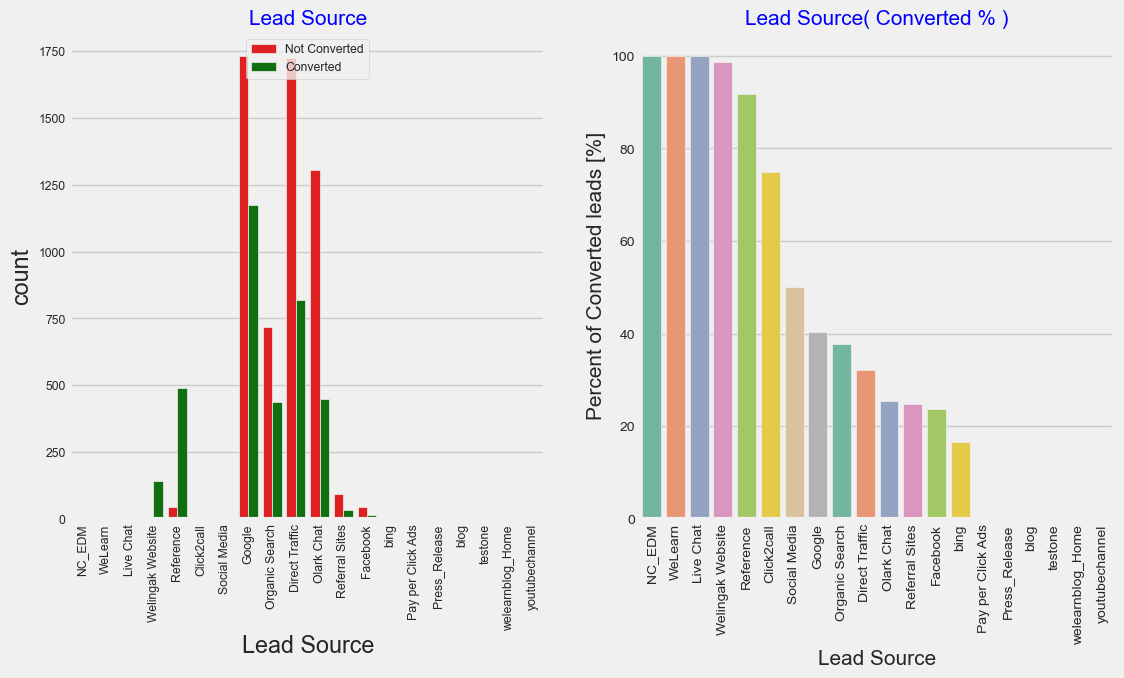

In [53]:
#Run the function to get plot categorical plots
univariate_categorical("Lead Source",label_rotation=True)

Strategy:
We will combine smaller lead sources as 'Other Sources'.

In [54]:
lead['Lead Source'] = lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other Sources')

        Lead Source  Total Leads   % Values
0            Google         2909  31.482684
1    Direct Traffic         2543  27.521645
2        Olark Chat         1755  18.993506
3    Organic Search         1154  12.489177
4         Reference          534   5.779221
5  Welingak Website          142   1.536797
6    Referral Sites          125   1.352814
7          Facebook           55   0.595238
8     Other Sources           23   0.248918


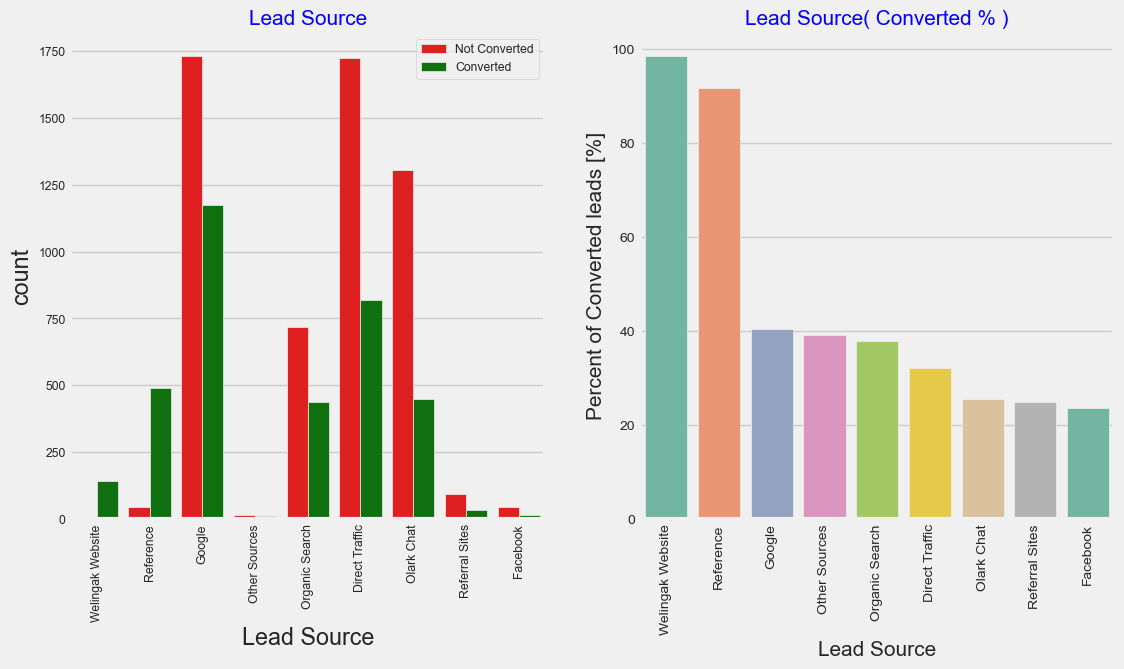

In [55]:
#Running the function again to check the updated statistics
univariate_categorical("Lead Source",label_rotation=True)

Insight: Google was the source of the most leads, with 40% of them converting, followed by Direct Traffic, Organic Search, and Olark Chat, with 35%, 38%, and 30% converting, respectively.
A lead generated by a referral has a conversion rate of more than 90% out of a total of 534.
The lead conversion rate on the Welingak website is around 100%. This option should be investigated further in order to boost lead conversion.
To improve lead count, measures should be implemented to encourage existing members to refer more people.

## Do not Email.

  Do Not Email  Total Leads   % Values
0           No         8506  92.056277
1          Yes          734   7.943723


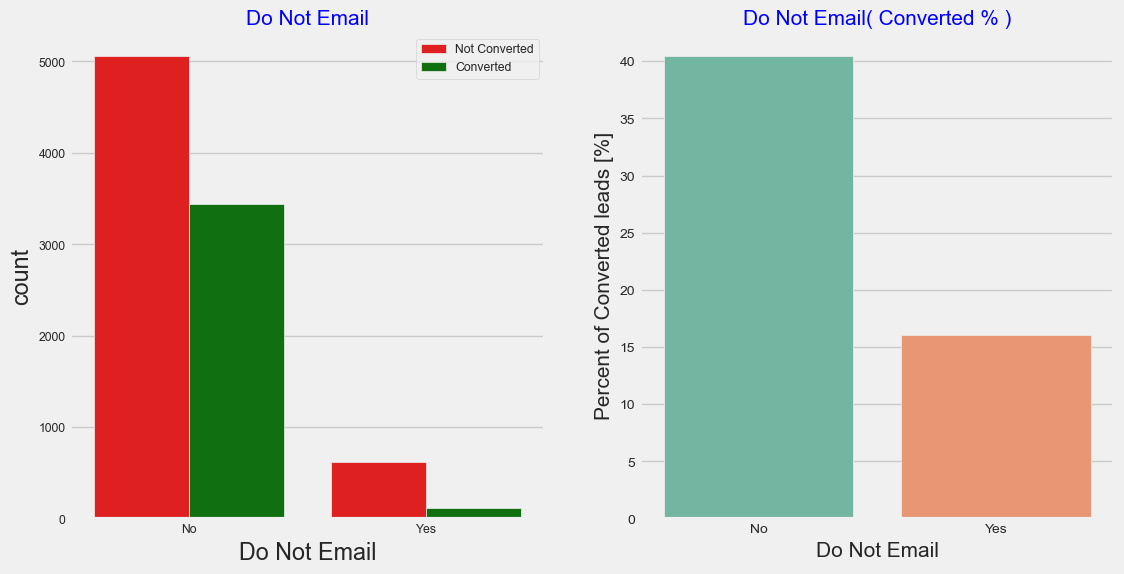

In [56]:
#Run the function to get plot categorical plots
univariate_categorical("Do Not Email")

Insight: The vast majority of individuals (92%) are fine with getting email.
Individuals that are comfortable with email have a 40% conversion rate.
Individuals who have opted out of receiving emails have a lower conversion rate (just 15%).

## Last Activity

                   Last Activity  Total Leads   % Values
0                   Email Opened         3540  38.311688
1                       SMS Sent         2745  29.707792
2        Olark Chat Conversation          973  10.530303
3        Page Visited on Website          640   6.926407
4              Converted to Lead          428   4.632035
5                  Email Bounced          326   3.528139
6             Email Link Clicked          267   2.889610
7      Form Submitted on Website          116   1.255411
8                    Unreachable           93   1.006494
9                   Unsubscribed           61   0.660173
10      Had a Phone Conversation           30   0.324675
11            Approached upfront            9   0.097403
12  View in browser link Clicked            6   0.064935
13                Email Received            2   0.021645
14             Email Marked Spam            2   0.021645
15    Visited Booth in Tradeshow            1   0.010823
16        Resubscribed to email

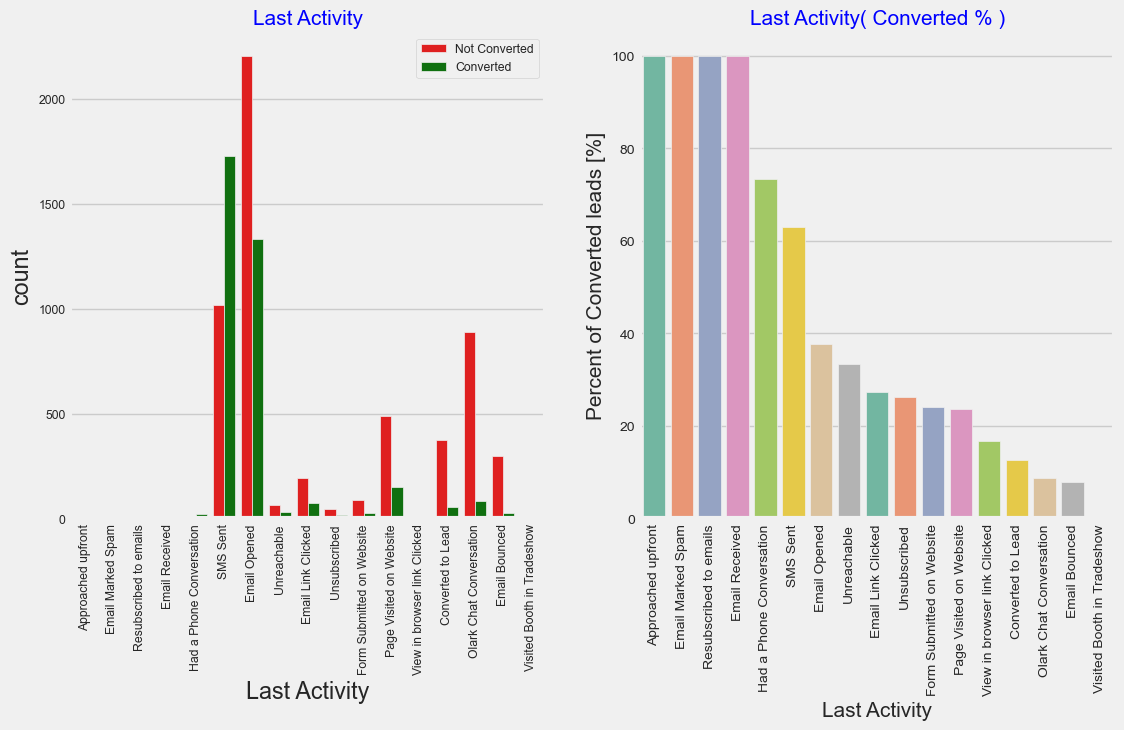

In [57]:
#Run the function to get plot categorical plots
univariate_categorical("Last Activity",label_rotation=True)

### Strategy:
We will combine smaller Last Activity values as 'Other Activity'.

In [58]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

                Last Activity  Total Leads   % Values
0                Email Opened         3540  38.311688
1                    SMS Sent         2745  29.707792
2     Olark Chat Conversation          973  10.530303
3     Page Visited on Website          640   6.926407
4           Converted to Lead          428   4.632035
5               Email Bounced          326   3.528139
6          Email Link Clicked          267   2.889610
7   Form Submitted on Website          116   1.255411
8                 Unreachable           93   1.006494
9                Unsubscribed           61   0.660173
10             Other Activity           51   0.551948


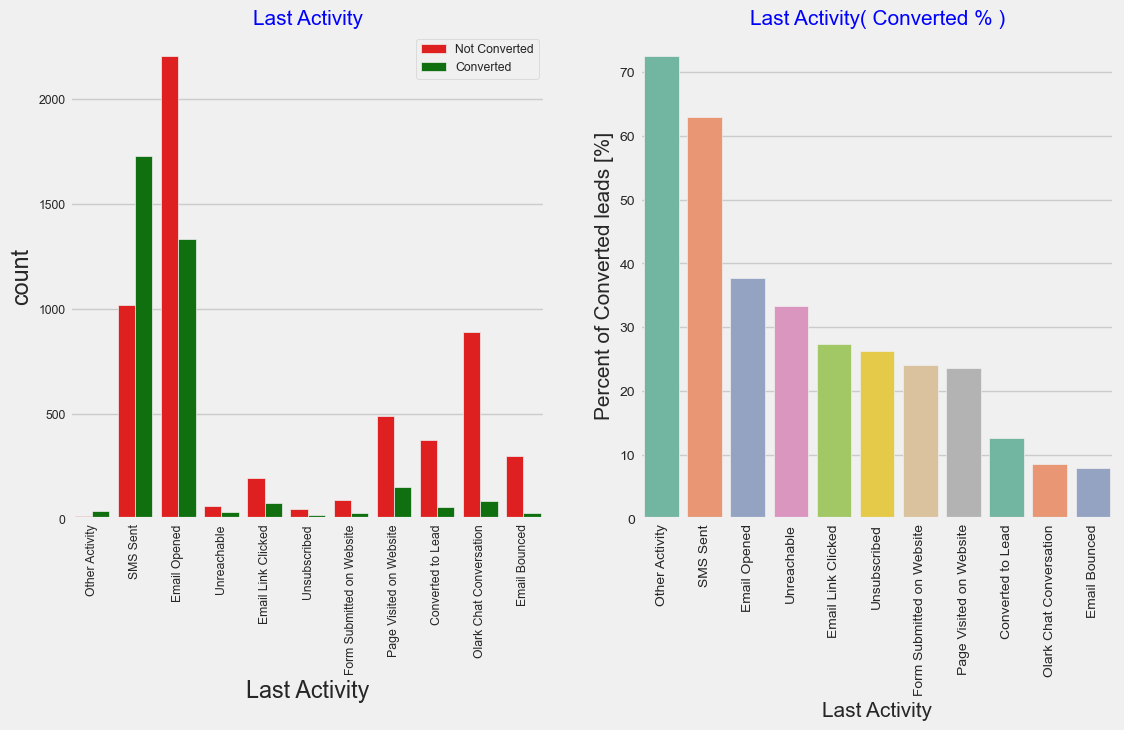

In [59]:
#Run the function to get plot categorical plots
univariate_categorical("Last Activity",label_rotation=True)

### Insight: 
The majority of leads have their Email open as their most recent action.
Lead conversion is quite high (70%) after merging smaller Last Activity kinds like Other Activity.
The conversion rate for leads with the most recent action as an SMS sent is around 60%.

## Specialization

                       Specialization  Total Leads   % Values
0                              Select         1942  21.017316
1                              Others         1438  15.562771
2                  Finance Management          976  10.562771
3           Human Resource Management          848   9.177489
4                Marketing Management          838   9.069264
5               Operations Management          503   5.443723
6             Business Administration          403   4.361472
7              IT Projects Management          366   3.961039
8             Supply Chain Management          349   3.777056
9   Banking, Investment And Insurance          338   3.658009
10                 Travel and Tourism          203   2.196970
11              Media and Advertising          203   2.196970
12             International Business          178   1.926407
13              Healthcare Management          159   1.720779
14             Hospitality Management          114   1.233766
15      

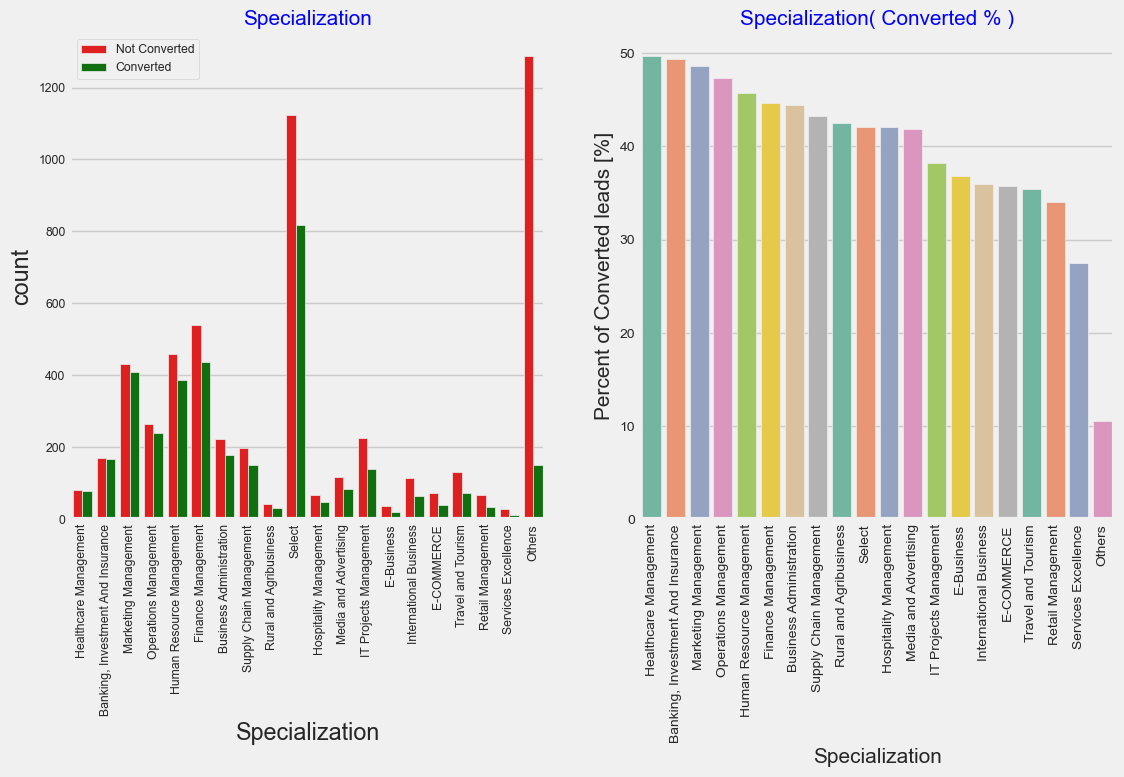

In [60]:
#Run the function to get plot categorical plots
univariate_categorical("Specialization",label_rotation=True)

### Insight:
Most of the leads have not mentioned a specialization and around 28% of those converted
Leads with Finance management and Marketing Management - Over 45% Converted

## occupation

             Occupation  Total Leads   % Values
0            Unemployed         5600  60.606061
1               Unknown         2690  29.112554
2  Working Professional          706   7.640693
3               Student          210   2.272727
4                 Other           16   0.173160
5             Housewife           10   0.108225
6           Businessman            8   0.086580


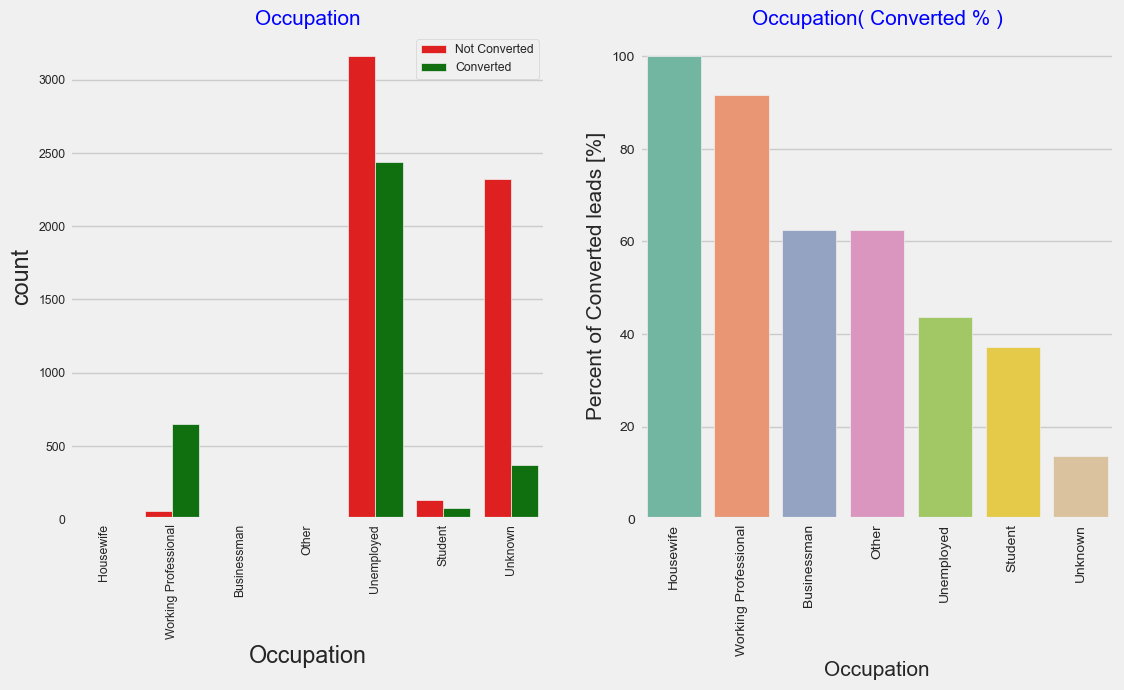

In [61]:
#Run the function to get plot categorical plots
univariate_categorical("Occupation",label_rotation=True)

### Insight
Despite there are fewer housewives, they have a 100% conversion rate.
Working professionals, business owners, and others have a high conversion rate.
Despite the fact that the most individuals have been reached, the conversion rate (40%) is poor.
We cannot mix smalled value categories since their conversion rates differ greatly. Combining them may result in incorrect forecasts.

## Search, Newspaper, Newspaper Article, Digital Advertisement, ,X Education Forums, Free Copy 

There are just two categories for the following features. We'll assess the skewness of the data and determine whether to eliminate it from model construction.

In [62]:
def pieplot(col):
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    converted = lead[col].value_counts().rename_axis('unique_values').to_frame('counts')
    plt.pie(converted.counts, labels = ["No","Yes"],colors = ['red','green'],autopct='%1.1f%%')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title(col)

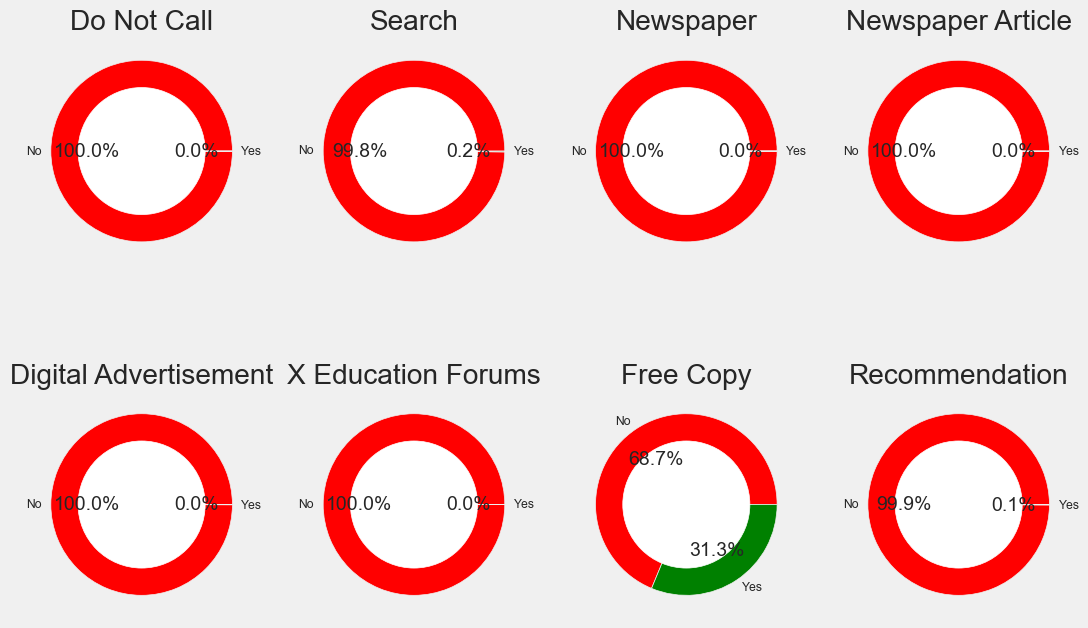

In [63]:
# Lets lookinto the data distribution of the following columns
col = ['Do Not Call','Search', 'Newspaper', 'Newspaper Article', 'Digital Advertisement', 'X Education Forums', 'Free Copy','Recommendation']
plt.figure(figsize = (12,8))
i=1
for each_col in col:
    plt.subplot(2,4,i)
    pieplot(each_col)
    i+=1

  Free Copy  Total Leads   % Values
0        No         6352  68.744589
1       Yes         2888  31.255411


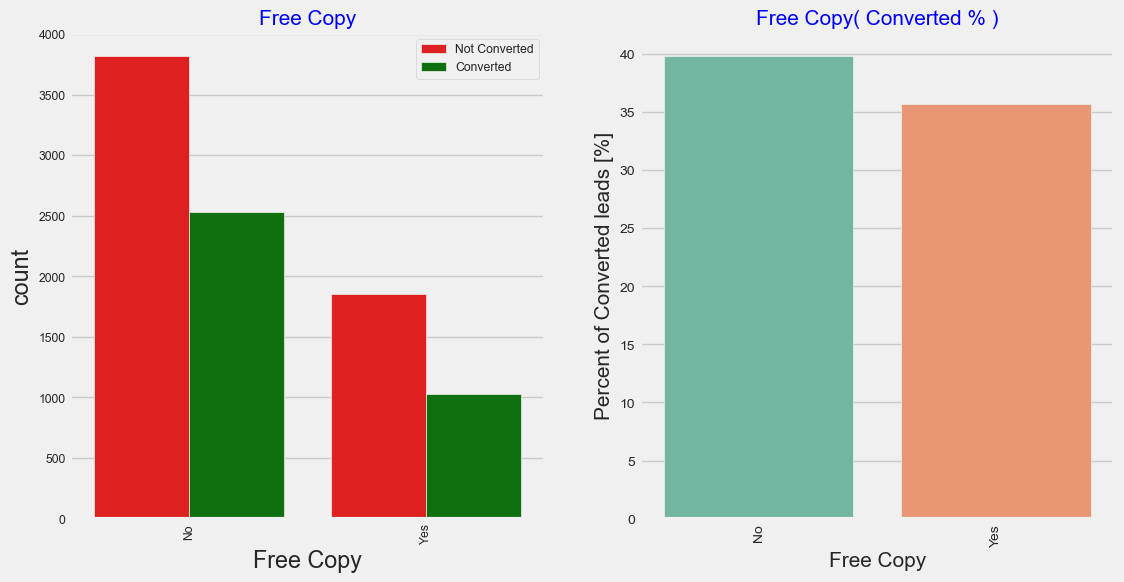

In [64]:
#Run the function to get plot categorical plots
univariate_categorical("Free Copy",label_rotation=True)

### Strategy: 
Search, Newspaper, Newspaper Article, Digital Advertising, X Education Forums, Suggestion data is highly skewed and should be removed because it adds no value to the model.
Providing a free copy of the Mastery Interview does not appear to provide much value because the coenversion rate is about the same. All of these columns will be removed.

In [65]:
lead.drop(col,axis = 1, inplace = True)
len(lead.columns)

10

## Univariate Analysis - Numerical

In [66]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'Occupation'],
      dtype='object')

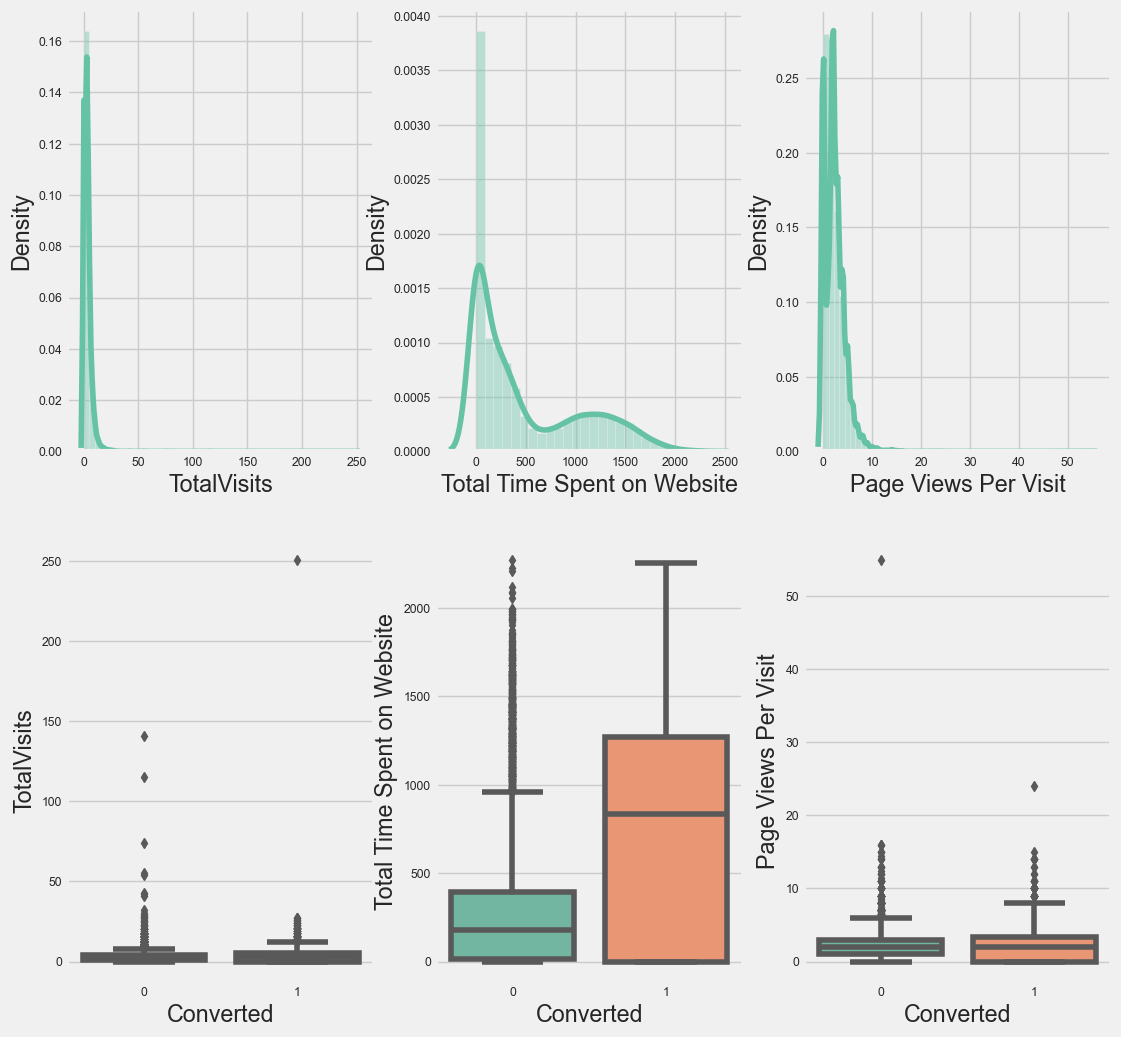

In [67]:
numerical_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
plt.figure(figsize=(12,12))

i=1
for col in numerical_cols:
    plt.subplot(2,3,i)
    sns.distplot(lead[col])
    plt.subplot(2,3,3+i)
    sns.boxplot(y=lead[col], x = lead['Converted'])
    i+=1

### Insight:
TotalVisits and Page Views per Visit has some outliers which needs to be treated.

## Bivariate Analysis

<Figure size 2000x2000 with 0 Axes>

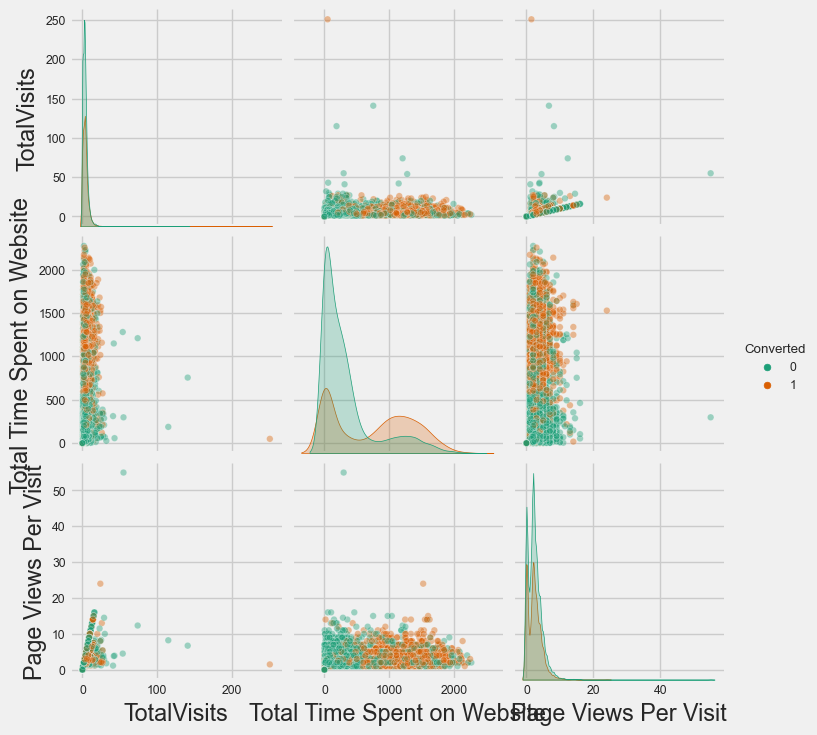

In [68]:
plt.figure(figsize =(20,20))
sns.pairplot(lead[numerical_col],hue="Converted",kind='scatter', plot_kws={'alpha':0.4},palette = 'Dark2')                                  
plt.show()

### Insight:
Data is not normally distributed.

# 6. Data Prepration

## Outliers Treatment 

In [69]:
#Checking the detailed percentile values
lead.describe(percentiles=[.1,.5,.25,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000


In [70]:
numerical_col

array(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'], dtype=object)

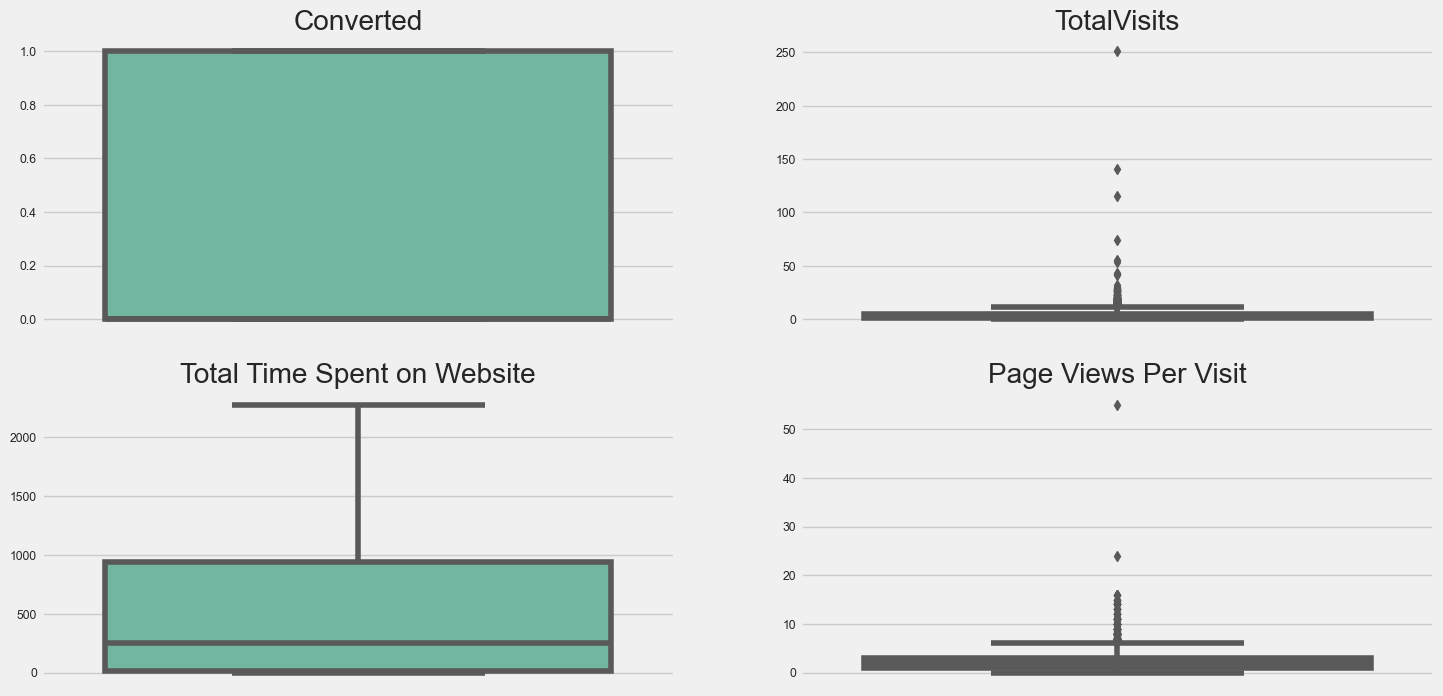

In [71]:
# plotting the numerical column for outlire values.
i=1
plt.figure(figsize=[16,8])
for col in numerical_col:
    plt.subplot(2,2,i)
    sns.boxplot(y=lead[col])
    plt.title(col)
    plt.ylabel('')
    i+=1

### Insignt:
Outliers in TotalVisits and Page Views Per Visit may show accurate numbers, but they will misclassify the outcomes and cause issues when forming inferences using the incorrect model. Outliers have a large effect on logistic regression. Hence, for the following reasons, let's limit TotalVisits and Page Views Per Visit to the 95th percentile:
The amount of data sets is rather large.
Because the 95th and 99th percentiles of these columns are so close, the impact of capping to the 95th or 99th percentile will be the same.

In [72]:
#Capping the data at 95% percetile value
Q4 = lead['TotalVisits'].quantile(0.95) # Get 95th quantile
print("Total number of rows getting capped for TotalVisits column : ",len(lead[lead['TotalVisits'] >= Q4]))
lead.loc[lead['TotalVisits'] >= Q4, 'TotalVisits'] = Q4 # outlier capping

Q4 = lead['Page Views Per Visit'].quantile(0.95) # Get 95th quantile
print("Total number of rows getting capped for Page Views Per Visit column : ",len(lead[lead['Page Views Per Visit'] >= Q4]))
lead.loc[lead['Page Views Per Visit'] >= Q4, 'Page Views Per Visit'] = Q4 # outlier capping

Total number of rows getting capped for TotalVisits column :  467
Total number of rows getting capped for Page Views Per Visit column :  604


### Insight
Insight:
The number of rows getting capped are quite high. This is also the reason that we are capping the data instead of deleting it.

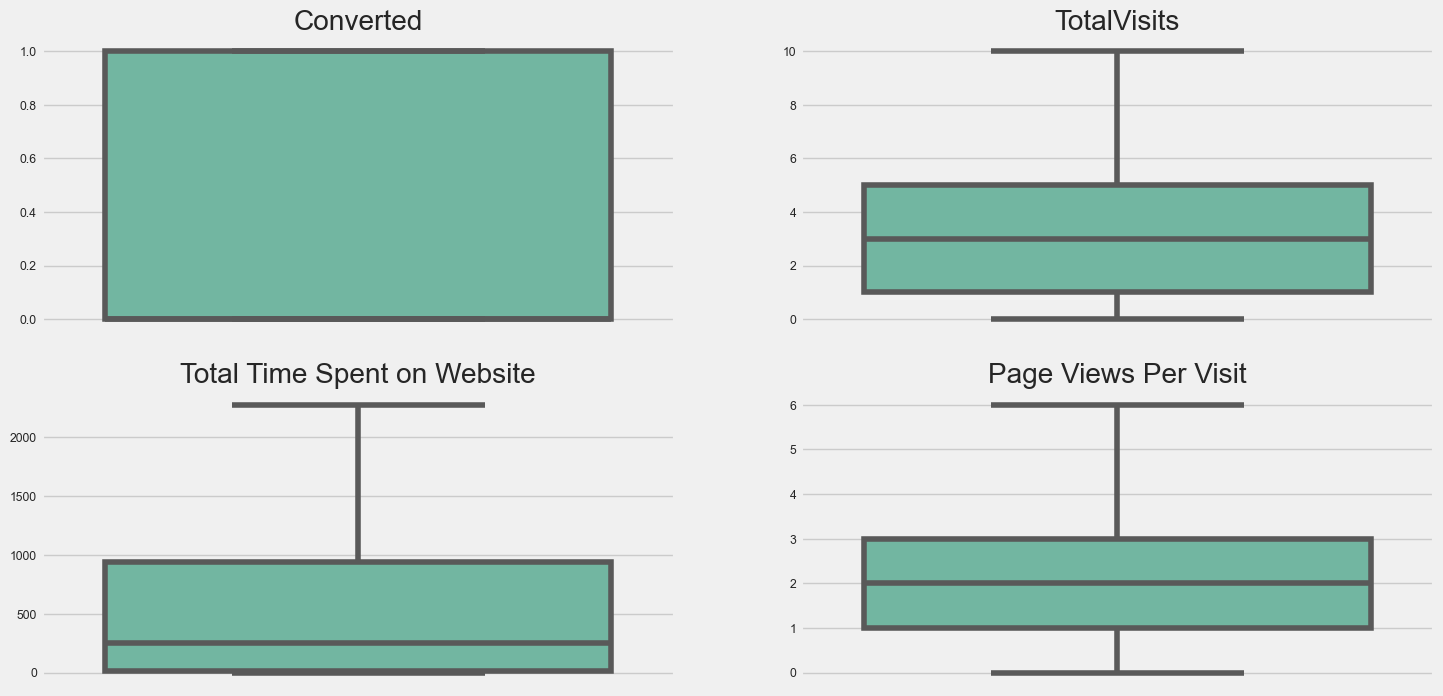

In [73]:
#replotting the graphs to check for outlier treatment
i=1
plt.figure(figsize=[16,8])
for col in numerical_col:
    plt.subplot(2,2,i)
    sns.boxplot(y=lead[col])
    plt.title(col)
    plt.ylabel('')
    i+=1

In [74]:
# Checking the percentile values again 
lead.describe(percentiles=[.1,.5,.25,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.179221,487.698268,2.255105
std,0.486714,2.761219,548.021466,1.779471
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000


### Insight:
Now that we have capped the outliers, let's proceed to data preparation for model building.

## Convert binary Categories

In [75]:
# Checking the unique value counts for categorcial columns
lead.nunique().sort_values()

Do Not Email                      2
Converted                         2
Lead Origin                       5
Occupation                        7
Lead Source                       9
TotalVisits                      11
Last Activity                    11
Specialization                   20
Page Views Per Visit             91
Total Time Spent on Website    1731
dtype: int64

In [76]:
# Checking the categorical values for 'Do Not Email' feature
lead['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [77]:
# List of variables to map

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the lead YES/NO variable list
lead['Do Not Email'] = lead[['Do Not Email']].apply(binary_map)

In [78]:
# rechecking the categorical values for 'Do Not Email' feature
lead['Do Not Email'].value_counts()

0    8506
1     734
Name: Do Not Email, dtype: int64

## Dummy variables

In [79]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Occupation', 'Last Activity', 'Specialization']], drop_first=True)

# Adding the results to the master dataframe
lead = pd.concat([lead, dummy1], axis=1)

lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [80]:
# We have created dummies for the below variables, so we can drop them
lead = lead.drop(['Lead Origin', 'Lead Source', 'Occupation', 'Last Activity', 'Specialization'], axis=1)
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 52 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 6   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 7   Lead Origin_Lead Import                   9240 non-null   uint8  
 8   Lead Origin_Quick Add Form                9240 non-null   uint8  
 9   Lead Source_Facebook                      9240 non-null   uint8  
 10  Lead Source_Google                  

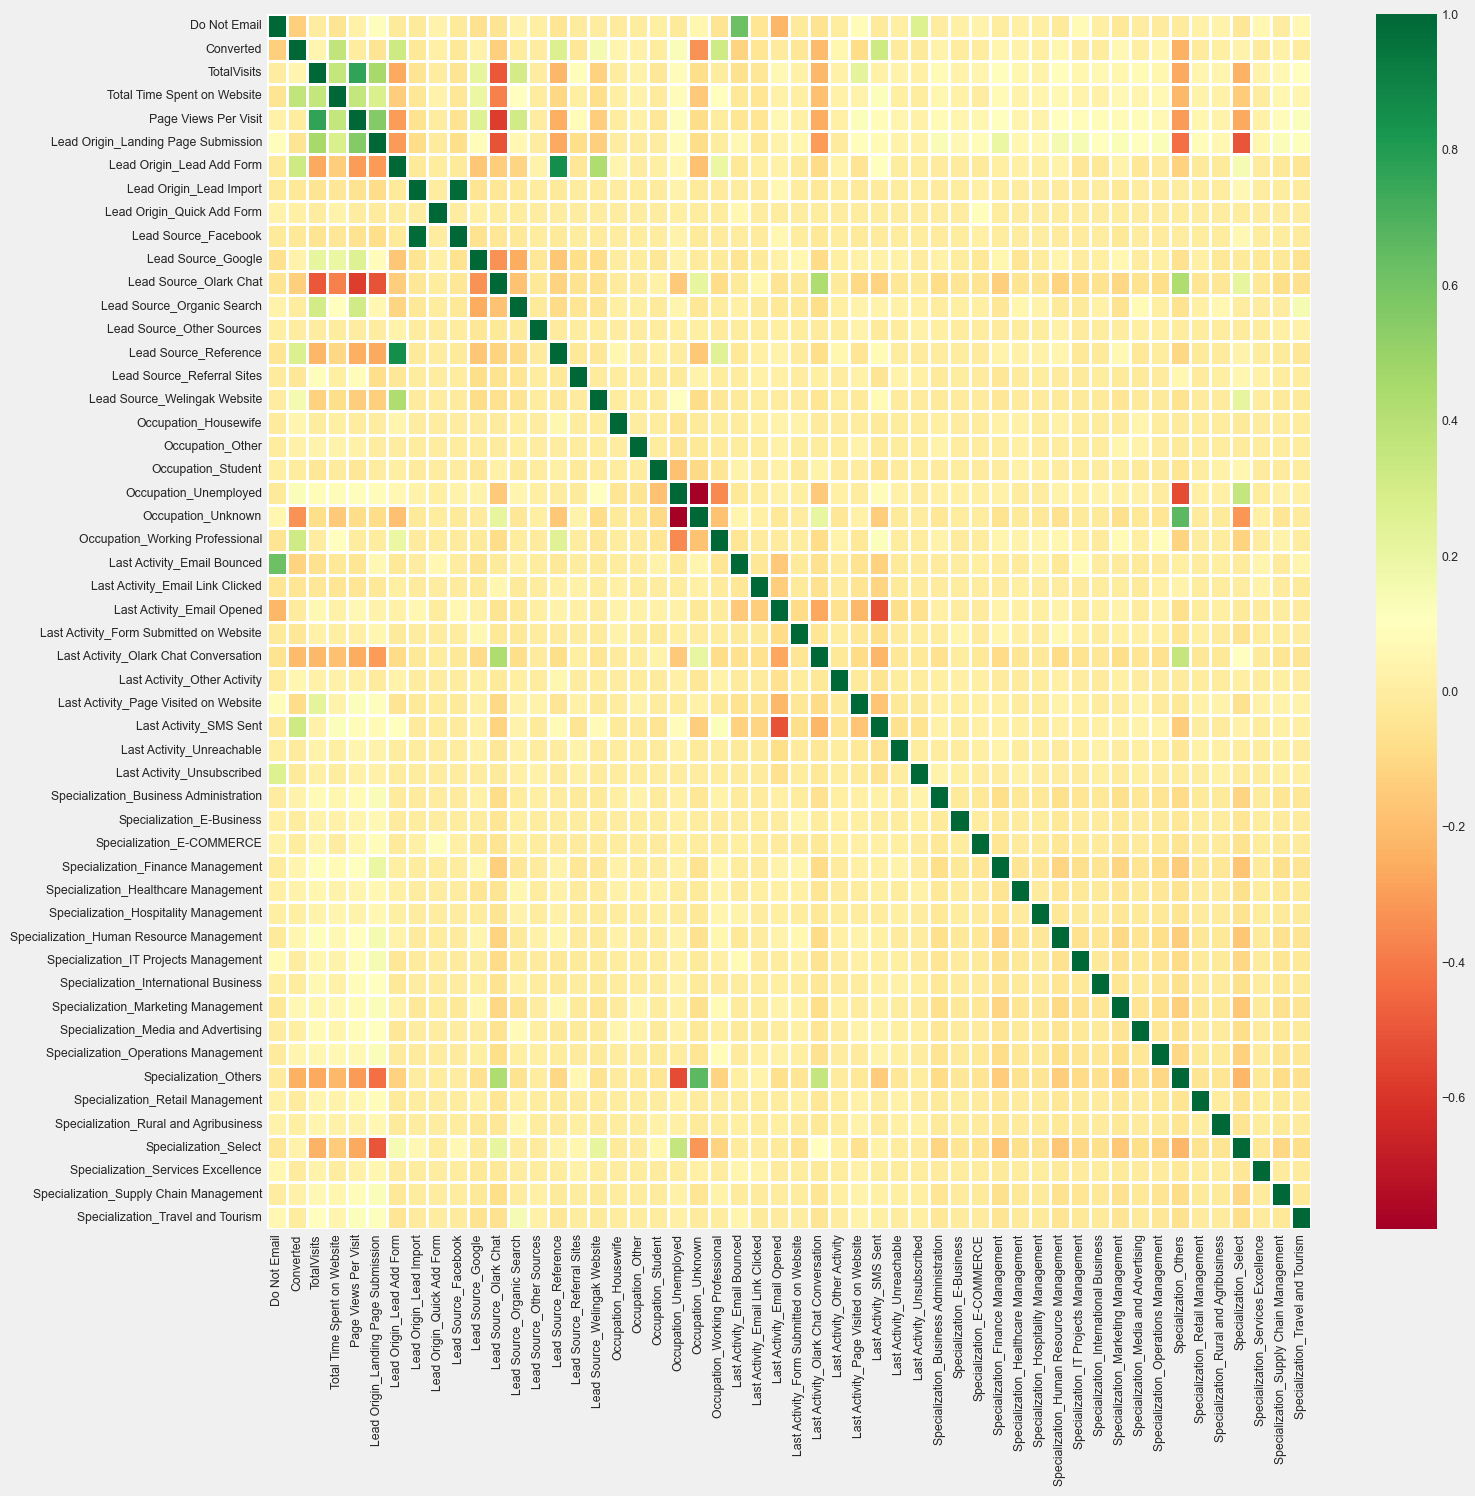

In [81]:
# Visualizing the data using heatmap
plt.figure(figsize=[15,15])
sns.heatmap(lead.corr(), cmap="RdYlGn",linewidth =1)
plt.show()

In [82]:
print('Total number of columns after One-Hot Encoding : ',len(lead.columns))

Total number of columns after One-Hot Encoding :  52


### Insight: 
Heatmap has 51 columns, making it tough to read. Let's have a look at the top 5 positively and adversely associated traits.

In [83]:
corr_lead = lead.corr()
corr_lead = corr_lead.where(np.triu(np.ones(corr_lead.shape),k=1).astype(np.bool))
corr_df = corr_lead.unstack().reset_index()
corr_df.columns =['VAR1','VAR2','Correlation']
corr_df.dropna(subset = ["Correlation"], inplace = True) 
corr_df.sort_values(by='Correlation', ascending=False, inplace=True)

# Top 5 Positive correlated variables
corr_df.head(5)

,VAR1,VAR2,Correlation
475,Lead Source_Facebook,Lead Origin_Lead Import,0.981709
734,Lead Source_Reference,Lead Origin_Lead Add Form,0.853237
210,Page Views Per Visit,TotalVisits,0.767585
2361,Specialization_Others,Occupation_Unknown,0.658088
1196,Last Activity_Email Bounced,Do Not Email,0.618470


In [84]:
corr_df.sort_values(by='Correlation', ascending=True, inplace=True)

# Top 5 Negatively correlated variables
corr_df.head(5)

,VAR1,VAR2,Correlation
1112,Occupation_Unknown,Occupation_Unemployed,-0.794875
576,Lead Source_Olark Chat,Page Views Per Visit,-0.573334
2360,Specialization_Others,Occupation_Unemployed,-0.532500
577,Lead Source_Olark Chat,Lead Origin_Landing Page Submission,-0.512950
1585,Last Activity_SMS Sent,Last Activity_Email Opened,-0.512325


## Train - Test Split

In [85]:
# target variable
Y = lead['Converted']
X = lead.drop(['Converted'], axis=1)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [86]:
#Checking the shape of the created Train & Test DFs
print(" Shape of X_train is : ",X_train.shape)
print(" Shape of y_train is : ",y_train.shape)
print(" Shape of X_test is  : ",X_test.shape)
print(" Shape of y_test is  : ",y_test.shape)

 Shape of X_train is :  (6468, 51)
 Shape of y_train is :  (6468,)
 Shape of X_test is  :  (2772, 51)
 Shape of y_test is  :  (2772,)


## Feature Scaling

Feature Scaling: We standardized the numeric attributes so they have a common mean of zero, if they were measured on different scales

In [87]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
1871,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6795,0,0.299722,0.005716,-0.516439,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3516,0,0.662077,-0.691418,0.143543,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8105,0,0.662077,1.365219,1.553761,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3934,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Insight: 
Now that we have our Train and Test databases available and the Train database has been standardised, let's attempt developing a model with Logistic Regression.

# 7. Model building

## RFE for Feature Reduction

In [88]:
# Using RFE to reduce the feature count from 54 to 20
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)


In [89]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 8),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 9),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 18),
 ('Lead Origin_Quick Add Form', False, 19),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 21),
 ('Lead Source_Other Sources', False, 6),
 ('Lead Source_Reference', False, 7),
 ('Lead Source_Referral Sites', False, 22),
 ('Lead Source_Welingak Website', True, 1),
 ('Occupation_Housewife', True, 1),
 ('Occupation_Other', False, 2),
 ('Occupation_Student', False, 4),
 ('Occupation_Unemployed', False, 3),
 ('Occupation_Unknown', True, 1),
 ('Occupation_Working Professional', True, 1),
 ('Last Activity_Email Bounced', False, 28),
 ('Last Activity_Email Link Clicked', False, 11),
 ('Last Activity_Email Opened', True, 1),
 ('La

In [90]:
#checking which columns remained after RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Occupation_Housewife',
       'Occupation_Unknown', 'Occupation_Working Professional',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Specialization_Rural and Agribusiness', 'Specialization_Select'],
      dtype='object')

In [91]:
#Columns which have been removed after RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Other Sources',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Occupation_Other', 'Occupation_Student', 'Occupation_Unemployed',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'S

In [92]:
# Functions to repeat Logictis regression model and VIF calculation repeatedly

# function to build logistic regression model
def build_logistic_model(feature_list):
    X_train_local = X_train[feature_list] # get feature list for VIF
    X_train_sm = sm.add_constant(X_train_local) # required by statsmodels   
    log_model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit() # build model and learn coefficients  
    return(log_model, X_train_sm) # return the model and the X_train fitted with constant 

#function to calculate VIF
def calculate_VIF(X_train):  # Calculate VIF for features
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns # Read the feature names
    vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])] # calculate VIF
    vif['VIF'] = round(vif['VIF'],2)
    vif.sort_values(by='VIF', ascending = False, inplace=True)  
    return(vif) # returns the calculated VIFs for all the features

## Manual Feature Reduction

### Strategy:
For Manual Feature Reduction, the following methods will be followed in order to reduce the features until we reach reasonable amount of feature count and maintain Sensitivity of the modeal =>80%
1. High P-Value
2. High VIF
3. High negative GLM coeeficient
4. Low Information Value (IV) generated based on WoE (Weight of Evidence)

## Model 1

In [93]:
features = list(rfe_col) #  Use RFE selected variables
log_model1, X_train_sm1 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.3
Date:                Sun, 26 Feb 2023   Deviance:                       5200.6
Time:                        11:50:44   Pearson chi2:                 8.07e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4086
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7994      0.150     -5.319      0.000      -1.094      -0.505
Do Not Email                             -1.1768      0.182     -6.461      0.000      -1.534      -0.820
Total Time Spent on Website               1.0630      0.040     26.620      0.000       0.985       1.141
Lead Origin_Landing Page Submission      -1.0547      0.130     -8.142      0.000      -1.309      -0.801
Lead Origin_Lead Add Form                 2.7511      0.204     13.463      0.000       2.351       3.152
Lead Source_Facebook                     -0.6623      0.522     -1.268      0.205      -1.686       0.361
Lead Source_Olark Chat                    1.0853      0.124      8.742      0.000       0.842       1.329
Lead Source_Welingak Website              2.4592      0.750      3.279      0.001       0.989       3.929
Occupation_Housewife                     22.7868   1.35e+04      0.002      0.999   -2.65e+04    2.66e+04
Occupation_Unknown                       -0.9764      0.113     -8.618      0.000      -1.198      -0.754
Occupation_Working Professional           2.4231      0.190     12.734      0.000       2.050       2.796
Last Activity_Email Opened                0.7342      0.110      6.654      0.000       0.518       0.950
Last Activity_Olark Chat Conversation    -0.5943      0.192     -3.095      0.002      -0.971      -0.218
Last Activity_Other Activity              2.2769      0.488      4.662      0.000       1.320       3.234
Last Activity_SMS Sent                    1.8785      0.112     16.811      0.000       1.659       2.097
Last Activity_Unreachable                 0.8635      0.368      2.349      0.019       0.143       1.584
Last Activity_Unsubscribed                1.3782      0.484      2.848      0.004       0.430       2.327
Specialization_Hospitality Management    -0.9704      0.327     -2.965      0.003      -1.612      -0.329
Specialization_Others                    -1.1637      0.187     -6.221      0.000      -1.530      -0.797
Specialization_Rural and Agribusiness     0.5384      0.389      1.384      0.166      -0.224       1.301
Specialization_Select                    -0.9218      0.129     -7.167      0.000      -1.174      -0.670
=========================================================================================================
"""

In [94]:
#Checking VIF values
calculate_VIF(X_train)

,Features,VIF
19,Occupation_Unemployed,38.68
20,Occupation_Unknown,21.00
5,Lead Origin_Lead Add Form,17.17
6,Lead Origin_Lead Import,16.90
8,Lead Source_Facebook,16.86
13,Lead Source_Reference,14.09
24,Last Activity_Email Opened,10.06
47,Specialization_Select,8.52
4,Lead Origin_Landing Page Submission,8.51
29,Last Activity_SMS Sent,8.17


## Model 2

### Strategy:
We will remove 'Occupation_Housewife' feature due to high P-value of 0.999

In [95]:
features.remove('Occupation_Housewife') # Remove 'Occupation_Housewife number' from RFE features list
log_model2, X_train_sm2 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2606.9
Date:                Sun, 26 Feb 2023   Deviance:                       5213.8
Time:                        11:50:46   Pearson chi2:                 8.10e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4074
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7896      0.150     -5.264      0.000      -1.084      -0.496
Do Not Email                             -1.1827      0.182     -6.495      0.000      -1.540      -0.826
Total Time Spent on Website               1.0619      0.040     26.623      0.000       0.984       1.140
Lead Origin_Landing Page Submission      -1.0499      0.129     -8.110      0.000      -1.304      -0.796
Lead Origin_Lead Add Form                 2.7683      0.204     13.561      0.000       2.368       3.168
Lead Source_Facebook                     -0.6637      0.522     -1.271      0.204      -1.687       0.359
Lead Source_Olark Chat                    1.0844      0.124      8.739      0.000       0.841       1.328
Lead Source_Welingak Website              2.4427      0.750      3.257      0.001       0.973       3.912
Occupation_Unknown                       -0.9843      0.113     -8.695      0.000      -1.206      -0.762
Occupation_Working Professional           2.4138      0.190     12.691      0.000       2.041       2.787
Last Activity_Email Opened                0.7322      0.110      6.658      0.000       0.517       0.948
Last Activity_Olark Chat Conversation    -0.5997      0.192     -3.126      0.002      -0.976      -0.224
Last Activity_Other Activity              2.2666      0.488      4.641      0.000       1.309       3.224
Last Activity_SMS Sent                    1.8686      0.111     16.769      0.000       1.650       2.087
Last Activity_Unreachable                 0.8524      0.368      2.318      0.020       0.132       1.573
Last Activity_Unsubscribed                1.3739      0.484      2.839      0.005       0.425       2.323
Specialization_Hospitality Management    -0.9775      0.327     -2.986      0.003      -1.619      -0.336
Specialization_Others                    -1.1603      0.187     -6.207      0.000      -1.527      -0.794
Specialization_Rural and Agribusiness     0.5300      0.389      1.363      0.173      -0.232       1.292
Specialization_Select                    -0.9276      0.129     -7.216      0.000      -1.180      -0.676
=========================================================================================================
"""

In [96]:
#Checking VIF Values
calculate_VIF(X_train[features])

,Features,VIF
16,Specialization_Others,3.13
2,Lead Origin_Landing Page Submission,3.07
7,Occupation_Unknown,2.80
9,Last Activity_Email Opened,2.58
12,Last Activity_SMS Sent,2.30
5,Lead Source_Olark Chat,2.22
18,Specialization_Select,1.84
10,Last Activity_Olark Chat Conversation,1.78
3,Lead Origin_Lead Add Form,1.64
6,Lead Source_Welingak Website,1.27


## Model 3

### Strategy:
We will remove 'Specialization_Retail Management' feature due to high P-value of 0.209

In [97]:
features.remove('Specialization_Retail Management')
log_model3, X_train_sm3 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model3.summary()

ValueError: list.remove(x): x not in list

In [99]:
#Checking VIF Values
calculate_VIF(X_train[features])

,Features,VIF
16,Specialization_Others,3.13
2,Lead Origin_Landing Page Submission,3.07
7,Occupation_Unknown,2.80
9,Last Activity_Email Opened,2.58
12,Last Activity_SMS Sent,2.30
5,Lead Source_Olark Chat,2.22
18,Specialization_Select,1.84
10,Last Activity_Olark Chat Conversation,1.78
3,Lead Origin_Lead Add Form,1.64
6,Lead Source_Welingak Website,1.27


## Model 4

### Strategy:
We will remove 'Lead Source_Facebook' feature due to high P-Value of 0.204

In [100]:
features.remove('Lead Source_Facebook')
log_model4, X_train_sm4 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.8
Date:                Sun, 26 Feb 2023   Deviance:                       5215.6
Time:                        12:17:02   Pearson chi2:                 8.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4073
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.8058      0.149     -5.392      0.000      -1.099      -0.513
Do Not Email                             -1.1828      0.182     -6.494      0.000      -1.540      -0.826
Total Time Spent on Website               1.0646      0.040     26.717      0.000       0.987       1.143
Lead Origin_Landing Page Submission      -1.0314      0.128     -8.028      0.000      -1.283      -0.780
Lead Origin_Lead Add Form                 2.7893      0.204     13.705      0.000       2.390       3.188
Lead Source_Olark Chat                    1.1034      0.123      8.946      0.000       0.862       1.345
Lead Source_Welingak Website              2.4407      0.750      3.255      0.001       0.971       3.910
Occupation_Unknown                       -0.9834      0.113     -8.684      0.000      -1.205      -0.761
Occupation_Working Professional           2.4124      0.190     12.688      0.000       2.040       2.785
Last Activity_Email Opened                0.7265      0.110      6.609      0.000       0.511       0.942
Last Activity_Olark Chat Conversation    -0.5991      0.192     -3.123      0.002      -0.975      -0.223
Last Activity_Other Activity              2.2677      0.489      4.642      0.000       1.310       3.225
Last Activity_SMS Sent                    1.8655      0.111     16.743      0.000       1.647       2.084
Last Activity_Unreachable                 0.8534      0.368      2.321      0.020       0.133       1.574
Last Activity_Unsubscribed                1.3737      0.484      2.837      0.005       0.425       2.323
Specialization_Hospitality Management    -0.9889      0.326     -3.030      0.002      -1.629      -0.349
Specialization_Others                    -1.1574      0.187     -6.194      0.000      -1.524      -0.791
Specialization_Rural and Agribusiness     0.5316      0.389      1.366      0.172      -0.231       1.294
Specialization_Select                    -0.9248      0.128     -7.210      0.000      -1.176      -0.673
=========================================================================================================
"""

In [101]:
#Checking VIF Values
calculate_VIF(X_train[features])

,Features,VIF
15,Specialization_Others,3.12
2,Lead Origin_Landing Page Submission,3.06
6,Occupation_Unknown,2.80
8,Last Activity_Email Opened,2.56
11,Last Activity_SMS Sent,2.29
4,Lead Source_Olark Chat,2.20
17,Specialization_Select,1.84
9,Last Activity_Olark Chat Conversation,1.78
3,Lead Origin_Lead Add Form,1.64
5,Lead Source_Welingak Website,1.27


## Model 5

### Strategy:
We will remove 'Specialization_Rural and Agribusiness' feature due to high P-Value of 0.174. All the parameters have VIF values below 3, which indicates that features are not Multi-colinear in nature.

In [102]:
features.remove('Specialization_Rural and Agribusiness')
log_model5, X_train_sm5 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2608.7
Date:                Sun, 26 Feb 2023   Deviance:                       5217.4
Time:                        12:17:04   Pearson chi2:                 8.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4071
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7972      0.149     -5.343      0.000      -1.090      -0.505
Do Not Email                             -1.1810      0.182     -6.491      0.000      -1.538      -0.824
Total Time Spent on Website               1.0642      0.040     26.713      0.000       0.986       1.142
Lead Origin_Landing Page Submission      -1.0314      0.128     -8.032      0.000      -1.283      -0.780
Lead Origin_Lead Add Form                 2.7880      0.203     13.703      0.000       2.389       3.187
Lead Source_Olark Chat                    1.1049      0.123      8.960      0.000       0.863       1.347
Lead Source_Welingak Website              2.4414      0.750      3.256      0.001       0.972       3.911
Occupation_Unknown                       -0.9851      0.113     -8.702      0.000      -1.207      -0.763
Occupation_Working Professional           2.4112      0.190     12.682      0.000       2.039       2.784
Last Activity_Email Opened                0.7252      0.110      6.602      0.000       0.510       0.941
Last Activity_Olark Chat Conversation    -0.6031      0.192     -3.144      0.002      -0.979      -0.227
Last Activity_Other Activity              2.2614      0.489      4.629      0.000       1.304       3.219
Last Activity_SMS Sent                    1.8625      0.111     16.733      0.000       1.644       2.081
Last Activity_Unreachable                 0.8463      0.368      2.301      0.021       0.126       1.567
Last Activity_Unsubscribed                1.3899      0.486      2.862      0.004       0.438       2.342
Specialization_Hospitality Management    -0.9952      0.326     -3.049      0.002      -1.635      -0.356
Specialization_Others                    -1.1632      0.187     -6.229      0.000      -1.529      -0.797
Specialization_Select                    -0.9321      0.128     -7.275      0.000      -1.183      -0.681
=========================================================================================================
"""

In [103]:
#Checking VIF Values
calculate_VIF(X_train[features])

,Features,VIF
15,Specialization_Others,3.12
2,Lead Origin_Landing Page Submission,3.05
6,Occupation_Unknown,2.80
8,Last Activity_Email Opened,2.56
11,Last Activity_SMS Sent,2.29
4,Lead Source_Olark Chat,2.20
16,Specialization_Select,1.84
9,Last Activity_Olark Chat Conversation,1.78
3,Lead Origin_Lead Add Form,1.64
5,Lead Source_Welingak Website,1.27


## Model 6

### Strategy:
All the features have significant P Values and VIF under 5. So next, we will look into WoE and Coefficient value to remove parameters. For coefficient, we will concentrate on negative coefficeints to remove, as we want more positive feature which can indicate identifying right candidate for lead conversion or how to improve further leads.

In [104]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [105]:
for col in lead.columns:
    if col in features:
        df, iv = calculate_woe_iv(lead, col, 'Converted')
        print('IV score of column : ',col, " is ", round(iv,4))

IV score of column :  Do Not Email  is  0.0954
IV score of column :  Total Time Spent on Website  is  0.6012
IV score of column :  Lead Origin_Landing Page Submission  is  0.0111
IV score of column :  Lead Origin_Lead Add Form  is  0.5615
IV score of column :  Lead Source_Olark Chat  is  0.0763
IV score of column :  Lead Source_Welingak Website  is  0.1853
IV score of column :  Occupation_Unknown  is  0.5436
IV score of column :  Occupation_Working Professional  is  0.5227
IV score of column :  Last Activity_Email Opened  is  0.0008
IV score of column :  Last Activity_Olark Chat Conversation  is  0.2711
IV score of column :  Last Activity_Other Activity  is  0.0115
IV score of column :  Last Activity_SMS Sent  is  0.4467
IV score of column :  Last Activity_Unreachable  is  0.0005
IV score of column :  Last Activity_Unsubscribed  is  0.002
IV score of column :  Specialization_Hospitality Management  is  0.0003
IV score of column :  Specialization_Others  is  0.3481
IV score of column : 

### Strategy:
We will remove 'Occupation_Unknown' feature due high negative coefficient. Additionally, Occupation_Unknown is imputed data by treating the null values. It means that the this feature indicates that some leads have not filled this Occupation column. It is difficult to interpret and take action on this feature in future. Thus we will remove this feature first.

In [106]:
features.remove('Occupation_Unknown')
log_model6, X_train_sm6 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2649.7
Date:                Sun, 26 Feb 2023   Deviance:                       5299.4
Time:                        12:17:12   Pearson chi2:                 8.68e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3995
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.9153      0.148     -6.205      0.000      -1.204      -0.626
Do Not Email                             -1.2057      0.181     -6.672      0.000      -1.560      -0.851
Total Time Spent on Website               1.0644      0.039     27.035      0.000       0.987       1.142
Lead Origin_Landing Page Submission      -1.1325      0.127     -8.900      0.000      -1.382      -0.883
Lead Origin_Lead Add Form                 2.8483      0.203     14.000      0.000       2.450       3.247
Lead Source_Olark Chat                    1.1044      0.123      8.970      0.000       0.863       1.346
Lead Source_Welingak Website              2.3948      0.750      3.193      0.001       0.925       3.865
Occupation_Working Professional           2.6077      0.190     13.741      0.000       2.236       2.980
Last Activity_Email Opened                0.7254      0.109      6.647      0.000       0.511       0.939
Last Activity_Olark Chat Conversation    -0.6130      0.192     -3.196      0.001      -0.989      -0.237
Last Activity_Other Activity              2.3864      0.483      4.936      0.000       1.439       3.334
Last Activity_SMS Sent                    1.8659      0.111     16.870      0.000       1.649       2.083
Last Activity_Unreachable                 0.8644      0.361      2.394      0.017       0.157       1.572
Last Activity_Unsubscribed                1.3702      0.486      2.818      0.005       0.417       2.323
Specialization_Hospitality Management    -1.0332      0.321     -3.220      0.001      -1.662      -0.404
Specialization_Others                    -2.0216      0.159    -12.732      0.000      -2.333      -1.710
Specialization_Select                    -0.8201      0.127     -6.458      0.000      -1.069      -0.571
=========================================================================================================
"""

In [107]:
#Checking VIF Values
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.81
7,Last Activity_Email Opened,2.55
10,Last Activity_SMS Sent,2.29
4,Lead Source_Olark Chat,2.20
14,Specialization_Others,1.87
15,Specialization_Select,1.83
8,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.64
0,Do Not Email,1.27
5,Lead Source_Welingak Website,1.27


## Model 7

In [108]:
for col in lead.columns:
    if col in features:
        df, iv = calculate_woe_iv(lead, col, 'Converted')
        print('IV score of column : ',col, " is ", round(iv,4))

IV score of column :  Do Not Email  is  0.0954
IV score of column :  Total Time Spent on Website  is  0.6012
IV score of column :  Lead Origin_Landing Page Submission  is  0.0111
IV score of column :  Lead Origin_Lead Add Form  is  0.5615
IV score of column :  Lead Source_Olark Chat  is  0.0763
IV score of column :  Lead Source_Welingak Website  is  0.1853
IV score of column :  Occupation_Working Professional  is  0.5227
IV score of column :  Last Activity_Email Opened  is  0.0008
IV score of column :  Last Activity_Olark Chat Conversation  is  0.2711
IV score of column :  Last Activity_Other Activity  is  0.0115
IV score of column :  Last Activity_SMS Sent  is  0.4467
IV score of column :  Last Activity_Unreachable  is  0.0005
IV score of column :  Last Activity_Unsubscribed  is  0.002
IV score of column :  Specialization_Hospitality Management  is  0.0003
IV score of column :  Specialization_Others  is  0.3481
IV score of column :  Specialization_Select  is  0.006


### Strategy:
We will remove 'Specialization_Others' due to difficulty of interpretability of the data as againg this "Other" category is combination of various specialization which has been comined in smaller chunks.

In [109]:
features.remove('Specialization_Others')
log_model7, X_train_sm7 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2739.6
Date:                Sun, 26 Feb 2023   Deviance:                       5479.2
Time:                        12:17:19   Pearson chi2:                 8.48e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3826
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.9524      0.124    -15.720      0.000      -2.196      -1.709
Do Not Email                             -1.2369      0.179     -6.910      0.000      -1.588      -0.886
Total Time Spent on Website               1.0944      0.039     28.089      0.000       1.018       1.171
Lead Origin_Landing Page Submission      -0.1510      0.100     -1.518      0.129      -0.346       0.044
Lead Origin_Lead Add Form                 3.4746      0.199     17.428      0.000       3.084       3.865
Lead Source_Olark Chat                    0.9868      0.117      8.448      0.000       0.758       1.216
Lead Source_Welingak Website              1.8716      0.749      2.499      0.012       0.403       3.340
Occupation_Working Professional           2.8492      0.187     15.252      0.000       2.483       3.215
Last Activity_Email Opened                0.7516      0.107      7.010      0.000       0.541       0.962
Last Activity_Olark Chat Conversation    -0.7588      0.184     -4.121      0.000      -1.120      -0.398
Last Activity_Other Activity              2.3440      0.482      4.868      0.000       1.400       3.288
Last Activity_SMS Sent                    1.8561      0.109     17.036      0.000       1.643       2.070
Last Activity_Unreachable                 0.9291      0.358      2.595      0.009       0.227       1.631
Last Activity_Unsubscribed                1.3535      0.478      2.832      0.005       0.417       2.290
Specialization_Hospitality Management    -0.8552      0.318     -2.692      0.007      -1.478      -0.233
Specialization_Select                     0.1971      0.099      1.990      0.047       0.003       0.391
=========================================================================================================
"""

In [110]:
#Checking VIF Values
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.59
7,Last Activity_Email Opened,2.23
10,Last Activity_SMS Sent,2.08
4,Lead Source_Olark Chat,1.99
3,Lead Origin_Lead Add Form,1.62
8,Last Activity_Olark Chat Conversation,1.53
14,Specialization_Select,1.52
5,Lead Source_Welingak Website,1.27
1,Total Time Spent on Website,1.25
0,Do Not Email,1.23


## Model 8

In [111]:
for col in lead.columns:
    if col in features:
        df, iv = calculate_woe_iv(lead, col, 'Converted')
        print('IV score of column : ',col, " is ", round(iv,4))

IV score of column :  Do Not Email  is  0.0954
IV score of column :  Total Time Spent on Website  is  0.6012
IV score of column :  Lead Origin_Landing Page Submission  is  0.0111
IV score of column :  Lead Origin_Lead Add Form  is  0.5615
IV score of column :  Lead Source_Olark Chat  is  0.0763
IV score of column :  Lead Source_Welingak Website  is  0.1853
IV score of column :  Occupation_Working Professional  is  0.5227
IV score of column :  Last Activity_Email Opened  is  0.0008
IV score of column :  Last Activity_Olark Chat Conversation  is  0.2711
IV score of column :  Last Activity_Other Activity  is  0.0115
IV score of column :  Last Activity_SMS Sent  is  0.4467
IV score of column :  Last Activity_Unreachable  is  0.0005
IV score of column :  Last Activity_Unsubscribed  is  0.002
IV score of column :  Specialization_Hospitality Management  is  0.0003
IV score of column :  Specialization_Select  is  0.006


### Strategy:
We will remove 'Specialization_Hospitality Management ' due to lowest WoE value and it also has negative coefficient value.

In [112]:
features.remove('Specialization_Hospitality Management')
log_model8, X_train_sm8 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.4
Date:                Sun, 26 Feb 2023   Deviance:                       5486.7
Time:                        12:17:26   Pearson chi2:                 8.40e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3819
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.9577      0.124    -15.777      0.000      -2.201      -1.715
Do Not Email                             -1.2385      0.179     -6.921      0.000      -1.589      -0.888
Total Time Spent on Website               1.0899      0.039     28.047      0.000       1.014       1.166
Lead Origin_Landing Page Submission      -0.1565      0.099     -1.574      0.115      -0.351       0.038
Lead Origin_Lead Add Form                 3.4428      0.198     17.380      0.000       3.055       3.831
Lead Source_Olark Chat                    0.9852      0.117      8.440      0.000       0.756       1.214
Lead Source_Welingak Website              1.8989      0.749      2.536      0.011       0.431       3.366
Occupation_Working Professional           2.8419      0.187     15.224      0.000       2.476       3.208
Last Activity_Email Opened                0.7511      0.107      7.012      0.000       0.541       0.961
Last Activity_Olark Chat Conversation    -0.7598      0.184     -4.129      0.000      -1.121      -0.399
Last Activity_Other Activity              2.3524      0.481      4.890      0.000       1.410       3.295
Last Activity_SMS Sent                    1.8536      0.109     17.035      0.000       1.640       2.067
Last Activity_Unreachable                 0.9203      0.357      2.577      0.010       0.220       1.620
Last Activity_Unsubscribed                1.3269      0.482      2.752      0.006       0.382       2.272
Specialization_Select                     0.2056      0.099      2.078      0.038       0.012       0.399
=========================================================================================================
"""

In [113]:
#Checking VIF Values
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.58
7,Last Activity_Email Opened,2.23
10,Last Activity_SMS Sent,2.08
4,Lead Source_Olark Chat,1.99
3,Lead Origin_Lead Add Form,1.62
8,Last Activity_Olark Chat Conversation,1.53
13,Specialization_Select,1.52
5,Lead Source_Welingak Website,1.27
1,Total Time Spent on Website,1.25
0,Do Not Email,1.23


## Model 9

### Strategy:
We will remove 'Last Activity_Other Activity' because this is a parameter created by combining multiple smaller categories of Last Activity and % of these data in whole database is less than 0.03%

In [114]:
features.remove('Last Activity_Other Activity')
log_model9, X_train_sm9 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2756.2
Date:                Sun, 26 Feb 2023   Deviance:                       5512.4
Time:                        12:17:26   Pearson chi2:                 7.33e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3794
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.8669      0.121    -15.386      0.000      -2.105      -1.629
Do Not Email                             -1.2642      0.178     -7.113      0.000      -1.613      -0.916
Total Time Spent on Website               1.0901      0.039     28.140      0.000       1.014       1.166
Lead Origin_Landing Page Submission      -0.1567      0.099     -1.580      0.114      -0.351       0.038
Lead Origin_Lead Add Form                 3.4528      0.198     17.474      0.000       3.066       3.840
Lead Source_Olark Chat                    0.9888      0.117      8.487      0.000       0.760       1.217
Lead Source_Welingak Website              1.8766      0.748      2.509      0.012       0.411       3.342
Occupation_Working Professional           2.8585      0.186     15.358      0.000       2.494       3.223
Last Activity_Email Opened                0.6591      0.104      6.330      0.000       0.455       0.863
Last Activity_Olark Chat Conversation    -0.8526      0.182     -4.676      0.000      -1.210      -0.495
Last Activity_SMS Sent                    1.7635      0.106     16.651      0.000       1.556       1.971
Last Activity_Unreachable                 0.8304      0.356      2.330      0.020       0.132       1.529
Last Activity_Unsubscribed                1.2580      0.482      2.612      0.009       0.314       2.202
Specialization_Select                     0.2034      0.099      2.061      0.039       0.010       0.397
=========================================================================================================
"""

In [115]:
# How many features in the model ?
len(features)

13

### Inferences: 
As Model No. 9, we have a stable model with all P-values of features being significant and VIF values being less than 3, indicating that there is little multi-colinearity. The majority of feature coefficients are positive. We will choose Model 8 as our final model and test it on the Train and Test Data Sets.

# 8. Model Evaluation : Train Dataset

In [116]:
# Create a matrix to Print the Accuracy, Sensitivity and Specificity
def lg_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    speci = TN/(TN+FP)
    sensi = TP/(TP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    FPR = FP/(TN + FP)
    FNR = FN/(TP + FN)
    pos_pred_val = TP /(TP+FP)
    neg_pred_val = TN /(TN+FN)
    
    print ("Model Accuracy value is              : ", round(accuracy*100,2),"%")
    print ("Model Sensitivity value is           : ", round(sensi*100,2),"%")
    print ("Model Specificity value is           : ", round(speci*100,2),"%")
    print ("Model Precision value is             : ", round(precision*100,2),"%")
    print ("Model Recall value is                : ", round(recall*100,2),"%")
    print ("Model True Positive Rate (TPR)       : ", round(TPR*100,2),"%")
    print ("Model False Positive Rate (FPR)      : ", round(FPR*100,2),"%")
    print ("Model Poitive Prediction Value is    : ", round(pos_pred_val*100,2),"%")
    print ("Model Negative Prediction value is   : ", round(neg_pred_val*100,2),"%")

## Predicted probability Calculation 

In [117]:
# Getting the predicted values on the train set
y_train_pred = log_model9.predict(X_train_sm9)
y_train_pred[:10]

1871    0.234317
6795    0.239612
3516    0.316643
8105    0.773496
3934    0.272758
4844    0.990331
3297    0.103394
8071    0.984624
987     0.230340
7423    0.904865
dtype: float64

In [118]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.23431672, 0.23961204, 0.31664258, 0.77349596, 0.27275811,
       0.99033131, 0.10339446, 0.9846235 , 0.23033974, 0.90486489])

In [119]:
#Creating a dataframe with the actual Converted flag and the Predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted_IND':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect_IND'] = y_train.index
y_train_pred_final.head()#Finding Optimal Cutoff Point
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.234317,1871,1,1,1,0,0,0,0,0,0,0
1,0,0.239612,6795,1,1,1,0,0,0,0,0,0,0
2,0,0.316643,3516,1,1,1,1,0,0,0,0,0,0
3,0,0.773496,8105,1,1,1,1,1,1,1,1,0,0
4,0,0.272758,3934,1,1,1,0,0,0,0,0,0,0


In [120]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','Precision','Recall'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted_IND'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec, rec, thresholds = precision_recall_curve(y_train_pred_final['Converted_IND'], y_train_pred_final[i])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci, prec[1], rec[1]]
cutoff_df

,prob,accuracy,sensi,speci,Precision,Recall
0.0,0.0,0.381262,1.000000,0.000000,1.000000,0.000000
0.1,0.1,0.591528,0.969586,0.358571,0.482251,0.969586
0.2,0.2,0.730365,0.918086,0.614693,0.594850,0.918086
0.3,0.3,0.796537,0.829684,0.776112,0.695445,0.829684
0.4,0.4,0.812461,0.756691,0.846827,0.752723,0.756691
0.5,0.5,0.807669,0.677210,0.888056,0.788480,0.677210
0.6,0.6,0.790816,0.580697,0.920290,0.817818,0.580697
0.7,0.7,0.774428,0.500811,0.943028,0.844156,0.500811
0.8,0.8,0.745671,0.383212,0.969015,0.884004,0.383212
0.9,0.9,0.711657,0.263990,0.987506,0.928673,0.263990


<Figure size 1800x800 with 0 Axes>

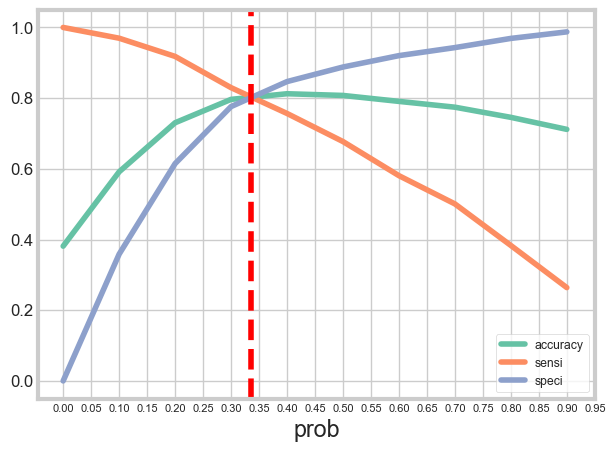

In [121]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(18,8))
sns.set_style("whitegrid")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.335, color='r', linestyle='--') # additing axline
plt.yticks(size=12)
plt.show()

### Inferences:
From the above graph, 0.335 seems to be ideal cut-off points

In [122]:
y_train_pred_final['final_predicted_1'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.335 else 0)
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) # deleting the unnecessary columns
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,final_predicted_1
0,0,0.234317,1871,0
1,0,0.239612,6795,0
2,0,0.316643,3516,0
3,0,0.773496,8105,1
4,0,0.272758,3934,0


In [123]:
# Let's assign Lead_score for the leads in Train Data Set
y_train_pred_final['lead_score_1']=(y_train_pred_final['Converted_Prob']*100).astype("int64")
y_train_pred_final.sort_values(by='Converted_Prob',ascending=False)

,Converted_IND,Converted_Prob,Prospect_IND,final_predicted_1,lead_score_1
4891,1,0.999500,8074,1,99
3115,1,0.999485,2656,1,99
6312,1,0.999111,3428,1,99
6187,1,0.998936,7579,1,99
2888,1,0.998867,7219,1,99
...,...,...,...,...,...
747,0,0.012963,6283,0,1
109,0,0.012255,6588,0,1
2244,0,0.011564,8252,0,1
2722,0,0.009252,7557,0,0


## Confusion Matrix

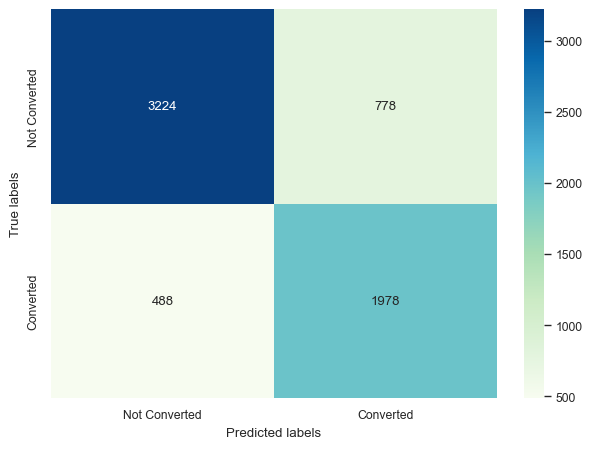

In [139]:
def draw_cm(actual, predicted, cmap):
    cm = metrics.confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True, fmt='.0f', cmap=cmap,
    xticklabels=["Not Converted", "Converted"],
    yticklabels=["Not Converted", "Converted"])
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.show()

draw_cm(y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_1'], "GnBu")


In [130]:
conf_matrix = confusion_matrix(y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_1'] )

lg_metrics(conf_matrix)

Model Accuracy value is              :  80.43 %
Model Sensitivity value is           :  80.21 %
Model Specificity value is           :  80.56 %
Model Precision value is             :  71.77 %
Model Recall value is                :  80.21 %
Model True Positive Rate (TPR)       :  80.21 %
Model False Positive Rate (FPR)      :  19.44 %
Model Poitive Prediction Value is    :  71.77 %
Model Negative Prediction value is   :  86.85 %


In [131]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report( y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_1'] ) )

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      4002
           1       0.72      0.80      0.76      2466

    accuracy                           0.80      6468
   macro avg       0.79      0.80      0.80      6468
weighted avg       0.81      0.80      0.81      6468



In [132]:
print("F1 Score: {}".format(f1_score(y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_1'])))

F1 Score: 0.7575641516660283


### Inferences: 
Model 9 with a cut off value of 0.335 has an accuracy of 80.55% and a sensitivity of 80.29%. In this scenario, sensitivity represents how many leads the model accurately identifies out of all prospective leads who convert. In this case study, the CEO has asked for more than 80%. The model's F1 Score and accuracy value are greater for 0s than for 1s. This implies that the model predicts leads that will not convert more accurately than leads that will convert (i.e. filtering leads that will not convert). This indirectly enhanced the model's ability to identify appropriate leads to contact.

## ROC Curve

An ROC curve demonstrates several things:

* It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity)
* The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
* The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [133]:
# Function to plot ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [134]:
# recoring the values FPR, TPR and Thresholds:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted_IND'], y_train_pred_final['Converted_Prob'] , drop_intermediate = False )

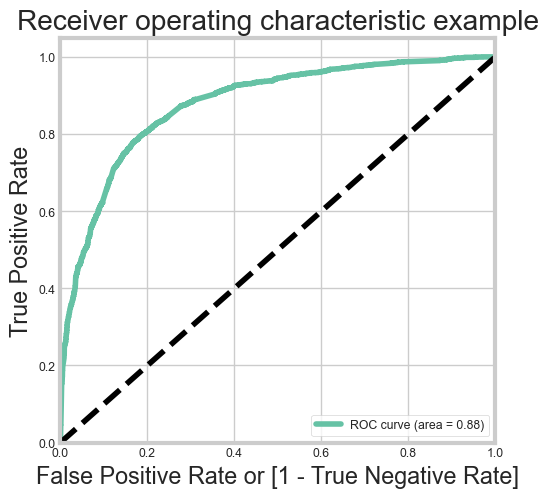

In [135]:
#plotting the ROC curve 
draw_roc(y_train_pred_final['Converted_IND'], y_train_pred_final['Converted_Prob'])

### Inferences:
ROC Curve aread is 0.88, which indicates that the model is good.

## Precision - Recall Trade off 

Next, we'll investigate the Precision-Recall trade-off to determine if balancing these parameters produces better results.
Precision indicates how many of all leads forecasted at 1 have actually converted.
Recall signifies how many of all leads that converted were accurately identified as 1. This is the same as the sensitivity value.

When there is a large imbalance in data, the precision-recall trade-off point is employed to determine the cut-off point. The data distribution in our situation is 62% versus 38%. As a result, data imbalance is not a significant factor.

In [136]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted_IND'], y_train_pred_final['Converted_Prob'])

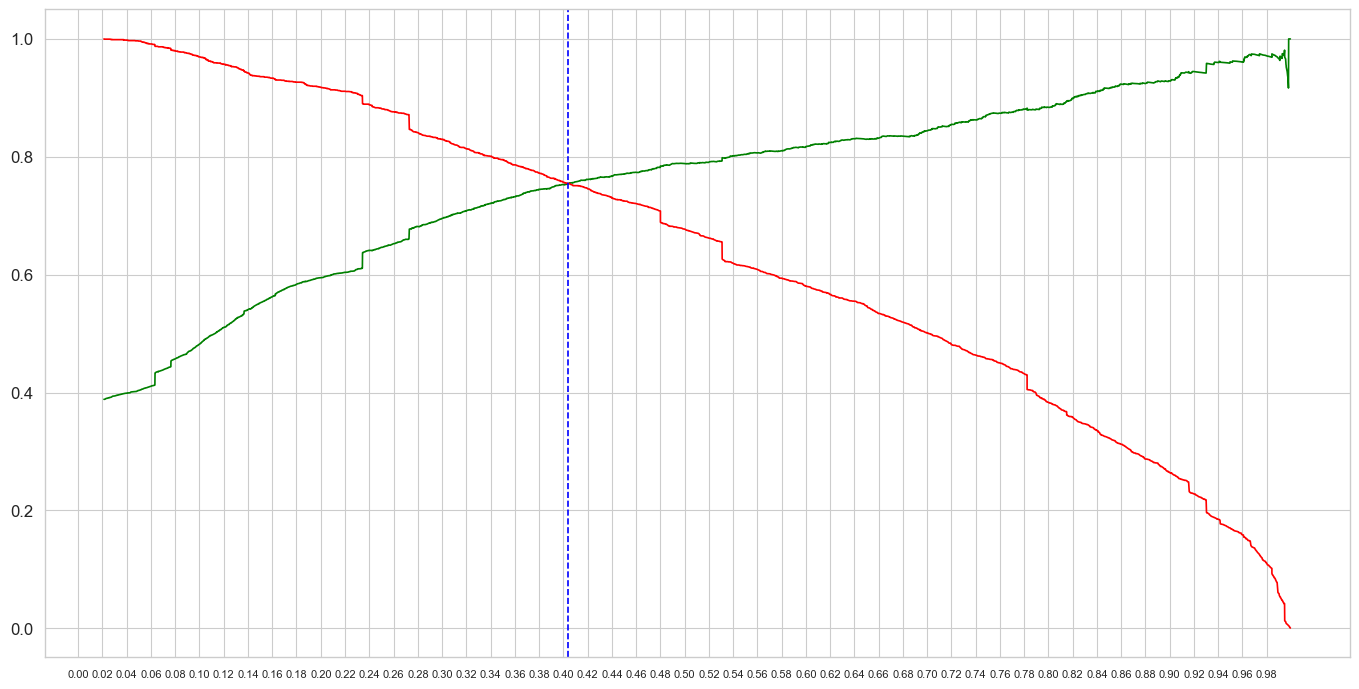

In [137]:
# Plotting the Precision-Recall Trade off Curve
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
sns.set_context("paper")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.404, color='b', linestyle='--') # additing axline
plt.xticks(np.arange(0,1,step=0.02),size=8)
plt.yticks(size=12)

plt.show()

### Inferences:
The cutoff point appears to be 0.404 based on the Precision-Recall Trade off curve. This threshold value will be used to evaluate test data.

In [138]:
# plotting the Train dataset again with 0.42 as cutoff
y_train_pred_final['final_predicted_2'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.404 else 0)
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,final_predicted_1,lead_score_1,final_predicted_2
0,0,0.23,1871,0,23,0
1,0,0.24,6795,0,23,0
2,0,0.32,3516,0,31,0
3,0,0.77,8105,1,77,1
4,0,0.27,3934,0,27,0


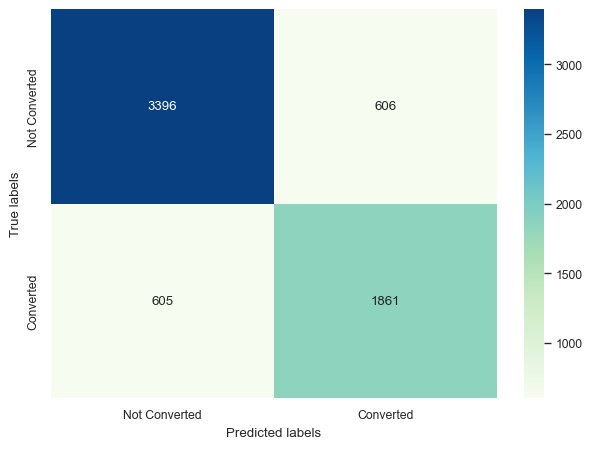

In [140]:
#Plotting the Confusion Matrix
draw_cm( y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_2'], "GnBu")

In [141]:
#Data based on cutoff received from Precision-Recall Trade off
conf_matrix = confusion_matrix(y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_2'] )
lg_metrics(conf_matrix)

Model Accuracy value is              :  81.28 %
Model Sensitivity value is           :  75.47 %
Model Specificity value is           :  84.86 %
Model Precision value is             :  75.44 %
Model Recall value is                :  75.47 %
Model True Positive Rate (TPR)       :  75.47 %
Model False Positive Rate (FPR)      :  15.14 %
Model Poitive Prediction Value is    :  75.44 %
Model Negative Prediction value is   :  84.88 %


In [142]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report( y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_2'] ) )

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4002
           1       0.75      0.75      0.75      2466

    accuracy                           0.81      6468
   macro avg       0.80      0.80      0.80      6468
weighted avg       0.81      0.81      0.81      6468



### Inferences:
By using the Precision - Recall trade off chart cut-off points, the model output has changed the following way :
* True Positive number has decreased.
* True Negative number has increase
* False Negative number has increase
* False Positive number has decreased


For our purpose CEO wants to identify the people correctly who will convert to leads. Thus, we cannot use Precision-Recall trade-off method as it reduced True Positive. We have to increase Sensitivity / Recall value to increase True Positives. Thus we will use 0.335 as cutoff point.

# 9. Model Evaluation : Test Dataset

In [143]:
# Scaling the test dataset :
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4269,0,1.75,0.96,2.12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2376,0,-1.15,-0.89,-1.27,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7766,0,0.66,-0.78,1.55,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9199,0,-1.15,-0.89,-1.27,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4359,0,-1.15,-0.89,-1.27,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [144]:
# Selecting only the columns used in final model of Train Dataset
X_test = X_test[features]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Occupation_Working Professional,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Select
4269,0,0.96,0,0,0,0,0,0,0,1,0,0,0
2376,0,-0.89,0,1,0,0,0,0,0,1,0,0,1
7766,0,-0.78,0,0,0,0,1,0,0,0,1,0,0
9199,0,-0.89,0,0,1,0,0,0,1,0,0,0,1
4359,0,-0.89,0,1,0,0,0,1,0,0,0,0,0


In [145]:
#adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.columns

Index(['const', 'Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Occupation_Working Professional', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Select'],
      dtype='object')

In [146]:
# Predicting the final test model 
y_test_pred = log_model9.predict(X_test_sm)

In [147]:
#checking the top 10 rows
y_test_pred[:10]

4269   0.72
2376   0.93
7766   0.73
9199   0.08
4359   0.78
9186   0.50
1631   0.42
8963   0.19
8007   0.09
5324   0.29
dtype: float64

In [148]:
# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.72
2376,0.93
7766,0.73
9199,0.08
4359,0.78


In [149]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [150]:
# Putting CustID to index
y_test_df['Prospect_IND'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect_IND,0
0,1,4269,0.72
1,1,2376,0.93
2,1,7766,0.73
3,0,9199,0.08
4,1,4359,0.78


In [151]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final= y_pred_final.rename(columns={ 'Converted' : 'Converted_IND'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect_IND','Converted_IND','Converted_Prob'], axis=1)
y_pred_final.head()

,Prospect_IND,Converted_IND,Converted_Prob
0,4269,1,0.72
1,2376,1,0.93
2,7766,1,0.73
3,9199,0,0.08
4,4359,1,0.78


In [152]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.335 else 0)
y_pred_final.head()

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted
0,4269,1,0.72,1
1,2376,1,0.93,1
2,7766,1,0.73,1
3,9199,0,0.08,0
4,4359,1,0.78,1


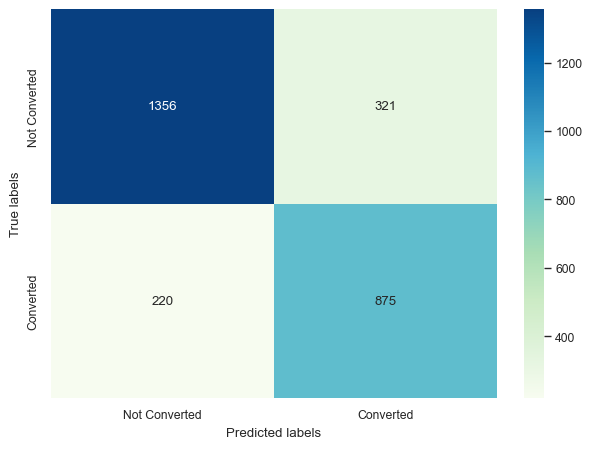

In [153]:
#Plotting the Confusion Matrix
draw_cm( y_pred_final['Converted_IND'], y_pred_final['final_predicted'], "GnBu")

In [154]:
conf_matrix = confusion_matrix(y_pred_final['Converted_IND'], y_pred_final['final_predicted'])

lg_metrics(conf_matrix)

Model Accuracy value is              :  80.48 %
Model Sensitivity value is           :  79.91 %
Model Specificity value is           :  80.86 %
Model Precision value is             :  73.16 %
Model Recall value is                :  79.91 %
Model True Positive Rate (TPR)       :  79.91 %
Model False Positive Rate (FPR)      :  19.14 %
Model Poitive Prediction Value is    :  73.16 %
Model Negative Prediction value is   :  86.04 %


### Inferences: 
The sensitivity on Test data is 80.09%, whereas it is 80.29% on Train data. The accuracy percentage is 80.48%. It demonstrates that the model performs well in the test data set as well and is not overtrained.

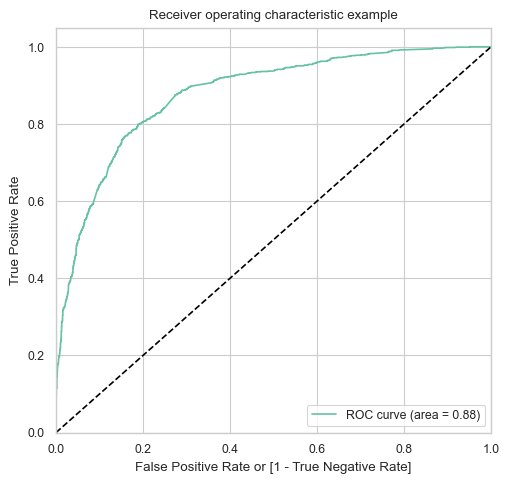

In [155]:
# Invoking the functio to draw ROC curve

draw_roc( y_pred_final['Converted_IND'], y_pred_final['Converted_Prob'])

### Inferences: 
A ROC score of 0.88 indicates that the model performed well in the Test dataset.

In [156]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report( y_pred_final['Converted_IND'], y_pred_final['final_predicted'] ) )

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1677
           1       0.73      0.80      0.76      1095

    accuracy                           0.80      2772
   macro avg       0.80      0.80      0.80      2772
weighted avg       0.81      0.80      0.81      2772



In [157]:
# Let's assign Lead_score for the leads in Test Data Set : 
y_pred_final['lead_score']=(y_pred_final['Converted_Prob']*100).astype("int64")
y_pred_final.sort_values(by='Converted_Prob',ascending=False)

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted,lead_score
745,6383,1,1.00,1,99
546,3478,1,1.00,1,99
2405,5921,1,1.00,1,99
1091,818,1,1.00,1,99
2150,133,1,1.00,1,99
...,...,...,...,...,...
2146,5472,0,0.01,0,1
796,6934,0,0.01,0,1
1396,7046,0,0.01,0,1
17,3545,0,0.01,0,1


In [158]:
# checking the data from top 
y_pred_final.head(5)

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted,lead_score
0,4269,1,0.72,1,72
1,2376,1,0.93,1,93
2,7766,1,0.73,1,72
3,9199,0,0.08,0,7
4,4359,1,0.78,1,78


In [159]:
# checking the data from bottom 
y_pred_final.tail(5)

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted,lead_score
2767,8649,0,0.08,0,8
2768,2152,1,0.93,1,93
2769,7101,0,0.27,0,27
2770,5331,0,0.26,0,26
2771,2960,1,0.93,1,93


### Inferences: 
The lead score field may be used to determine which prospective leads to prioritise first. The bigger the score, the more likely it is that the lead will convert. If there are a limited number of sales professionals, the score cut-off should be higher to guarantee that persons with a greater conversion probability are contacted further to convert them into a potential client. That is the same as boosting the model's accuracy by altering the cut-off point to a higher value. If there are more resources available on the sales team (for example, interns), the score cut-off might be decreased. When there are more human resources, the corporation can tolerate a larger percentage of false positives because it will enhance consumer outreach and, as a result, revenue.

# 10. Conclusion:

## Model predictorys

In [160]:
# Let's look into final model features and coefficients 
pd.options.display.float_format = '{:.2f}'.format
final_parameters = log_model9.params[1:]
final_parameters

Do Not Email                            -1.26
Total Time Spent on Website              1.09
Lead Origin_Landing Page Submission     -0.16
Lead Origin_Lead Add Form                3.45
Lead Source_Olark Chat                   0.99
Lead Source_Welingak Website             1.88
Occupation_Working Professional          2.86
Last Activity_Email Opened               0.66
Last Activity_Olark Chat Conversation   -0.85
Last Activity_SMS Sent                   1.76
Last Activity_Unreachable                0.83
Last Activity_Unsubscribed               1.26
Specialization_Select                    0.20
dtype: float64

In [161]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

top_predictors = final_parameters
top_predictors = 100.0 * (top_predictors / top_predictors.max())
top_predictors

Do Not Email                            -36.62
Total Time Spent on Website              31.57
Lead Origin_Landing Page Submission      -4.54
Lead Origin_Lead Add Form               100.00
Lead Source_Olark Chat                   28.64
Lead Source_Welingak Website             54.35
Occupation_Working Professional          82.79
Last Activity_Email Opened               19.09
Last Activity_Olark Chat Conversation   -24.69
Last Activity_SMS Sent                   51.07
Last Activity_Unreachable                24.05
Last Activity_Unsubscribed               36.43
Specialization_Select                     5.89
dtype: float64

<Figure size 1200x800 with 0 Axes>

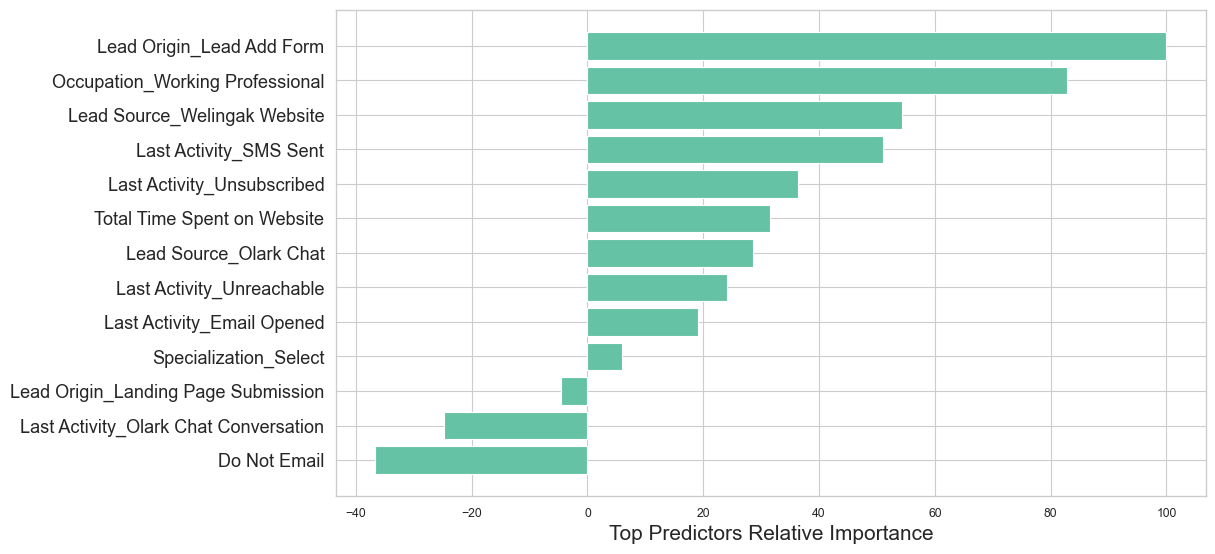

In [162]:
# Plotting the predictors based on their relative importance
top_predictors_sort = np.argsort(top_predictors,kind='quicksort',order='list of str')
fig = plt.figure(figsize = (12,8))
pos = np.arange(top_predictors_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,6))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_predictors[top_predictors_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[features].columns)[top_predictors_sort], fontsize=13)
ax.set_xlabel('Top Predictors Relative Importance', fontsize=15)
plt.show()

# Model Summary

### Interpretation Several predictor variables in a logistic regression model
In general, numerous predictor variables can be included in a logistic regression model, as shown below:


logit(p) = log(p/(1-p)) = 0 + 1 * X1 +... + n * Xn

Using our example dataset as a basis, each estimated coefficient is the predicted change in the log odds of being a possible lead for a unit increase in the relevant predictor variable while keeping the other predictor variables constant at a specific value. An exponentiated coefficient is the ratio of two probabilities, or the change in odds on a multiplicative scale given a unit increase in the related predictor variable while maintaining the other variables constant.

### The magnitude and sign of the coefficients loaded in the logit function:¶
logit(p) = log(p/(1-p)) = (3.42 * Lead Origin_Lead Add Form) + (2.84 * Occupation_Working Professional) + (1.99 * Lead Source_Welingak Website) + (1.78 * Last Activity_SMS Sent) + (1.25 * Last Activity_Unsubscribed) + (1.09 * Total Time Spent on Website) + (0.98 * Lead Source_Olark Chat) + (0.84 * Last Activity_Unreachable) + (0.66 * Last Activity_Email Opened) - (0.25 * Lead Origin_Landing Page Submission) -(0.87 * Last Activity_Olark Chat Conversation) - (1.26 * Do Not Email) -1.77

The estimations allow us to make forecasts. This is accomplished by estimating the effects of all predictors for a specific scenario, adding them up, and applying a logistic transformation.
Consider the case of a working professional who was recognised via the Welingak website, spoke on Olark Chat, spent little time on the website, and requested to be contacted through email.

We can then compute his conversion probability as 3.42 * 0 + 2.84 * 1 + 1.99 * 1 + 1.78 * 0 + 1.25 * 0 + 1.09 * 0 + 0.98 * 0 + 0.84 * 0 + 0.66 * 0 - 0.25 * 0 -0.87 * 1 - 1.26 * 0 -1.77 = 2.84 + 1.99 - 0.87 - 1.77 = 2.19 log(p/(1-p)).

The logistic transformation is:
Probability = 1 / (1 + exp(-x)) = 1 /(1 + exp(- -2.19)) = 1 /(1 + exp(2.2)) = 0.10 = 10%

### Probability Prediction
The estimations allow us to make forecasts. This is accomplished by estimating the effects of all predictors for a specific scenario, adding them up, and applying a logistic transformation.

Consider the case of a working professional who was recognised via the Welingak website, spoke on Olark Chat, spent little time on the website, and requested to be contacted through email.

Then we can calculate his conversion probability as 3.41 * 0 + 2.82 * 1 + 2.34 * 0 + 2.01 * 1 + 1.86 * 0 + 1.32 * 0 + 1.09 * 0 + 0.97 * 0 + 0.93 * 0 + 0.76 * 0 - 0.26 * 0 -0.77 * 1 - 1.24 * 0 -1.86
which is 2.82 + 2.01 - 0.77 - 1.86 = 2.2 which is log(p/(1-p))

The logistic transformation is:
Probability = 1 / (1 + exp(-x)) = 1 /(1 + exp(- -2.2)) = 1 /(1 + exp(2.2)) = 0.143 = 14.3%

### Probability ratios
Because the idea of odds ratios is more social than rational, the marketing team may need to get odds rather than probabilities at times.

To understand odds ratios, we must first define odds, which is defined as the ratio of the probability of two mutually incompatible occurrences. Consider our prior forecast of a 10% lead conversion chance in the section on probabilities. Because the lead conversion chance is 10%, the non-conversion probability is 100% - 10% = 90%, and hence the odds are 10% vs 90%. When we divide both sides by 90%, we get 0.11 versus 1, which we can just write as 0.11. Thus, 0.11 odds is merely another way of describing a chance of lead conversion of 10%.

Similarly, leaving other categorical and numerical factors constant, the odds of a lead being converted for a Working Professional (Working Professional = 1) over the odds of a lead being converted for non-working professionals (Working Professional = 0) is exp(.2.84) = 17.11.

When all other variables are set to zero, log(p/(1-p)) = 17.11.

We may utilise odds ratios to detect possible lead conversions by comparing people' profiles.

# Thank You